# Seasonal hydrogen storage and alternative carriers: 
# A flexible hydrogen supply chain architecture model

## Introduction
First of all, we need to import important modules from Python and own python stuff

In [1]:
import copy as copy
import numpy as np
import pandas as pd
from Module import plotFunctions as pFun
from Module import calcFunctions as cFun
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

To generalize the script, we prepare the working directory

In [2]:
# %% special parameter
path = os.getcwd()
tabpath = "\\data\\ImportTablesTechnologies.xlsx"
datapath = path + tabpath
imagepath = path + "\\images\\klein\\"
#resultpath="F:\Sciebo\Documentation\Publication LOHC\Graphics\Results"
resultpath="C:\\Alles\\Sciebo\\Documentation\\Publication LOHC\\Graphics\\Results\\"

In [3]:
# %% Read Parameter from Excel File
dfTable = pd.read_excel(datapath, sheetname=None)

## Point-to-point Analysis of Hydrogen Supply Chains
These Analyses try to investigate the cheapest technology combination dependant of Transportation Distance and Hydrogen Demand


In [4]:
# %% Calculation of demand and distance arrays
demArr, distArr = cFun.builtDemDistArray(demMax=100000,     # maximal demand
                                         distMax=500,       # maximal distance
                                         res=100)           # Resolution

### Seasonal Storage Technology = Transportation Technogy
To reduce the Number of possible pathways and kick out all pathways without economical feasiblity, we first consider just pathways without a conversion between storage and transportation

In [5]:
# %% Built the Hydrogen Supply Chains
dfHSC = cFun.BuiltHSC(dfTable,
                      conn=0,
                      conversionStorageTransport=False,
                      gTanks=True)

Calculation and initialization stuff

In [6]:
#Initialization
totalCost = np.empty((len(distArr), demArr.shape[1], len(dfHSC)))
minimalCost = np.empty((len(distArr), demArr.shape[1]))

#Calculation
for i in range(len(dfHSC)):
    # Module Calculation
    Production, Connector1, Storage, Connector2, Transport, Station = cFun.calcHSC(
        demArr, distArr, dfHSC, dfTable, i)
#Read interesting Numbers
    totalCost[:, :, i] = Station.getTotalCost()
#Cut disturbing Data
cuttedCost = copy.copy(totalCost)
lineCost = copy.copy(totalCost)
lineCost[:, :, :] = np.nan
minimalLineCost = np.empty((len(distArr), demArr.shape[1]))
minimalLineCost[:, :] = np.nan

for i in range(len(distArr)):
    for j in range(len(demArr.T)):
        minimalCost[i, j] = min(cuttedCost[i, j, :])

        for k in range(len(dfHSC)):
            if minimalCost[i, j] < cuttedCost[i, j, k]:
                cuttedCost[i, j, k] = np.nan
                if (
                    np.isnan(cuttedCost[i, j, k]) and np.isnan(cuttedCost[i - 1, j, k]) == False) or (np.isnan( cuttedCost[i, j, k]) == False and np.isnan(cuttedCost[i - 1, j, k]) == True):
                    if not(i == 0):
                        minimalLineCost[i, j] = minimalCost[i, j]
                        minimalLineCost[i - 1, j] = minimalCost[i - 1, j]
                        minimalLineCost[i, j - 1] = minimalCost[i, j - 1]
                elif (np.isnan(cuttedCost[i, j, k]) and np.isnan(cuttedCost[i, j - 1, k]) == False) or (np.isnan(cuttedCost[i, j, k]) == False and np.isnan(cuttedCost[i, j - 1, k]) == True):
                    if not j == 0:
                        minimalLineCost[i, j] = minimalCost[i, j]
                        minimalLineCost[i - 1, j] = minimalCost[i - 1, j]
                        minimalLineCost[i, j - 1] = minimalCost[i, j - 1]

And finally we want to plot everything in a 3D plot

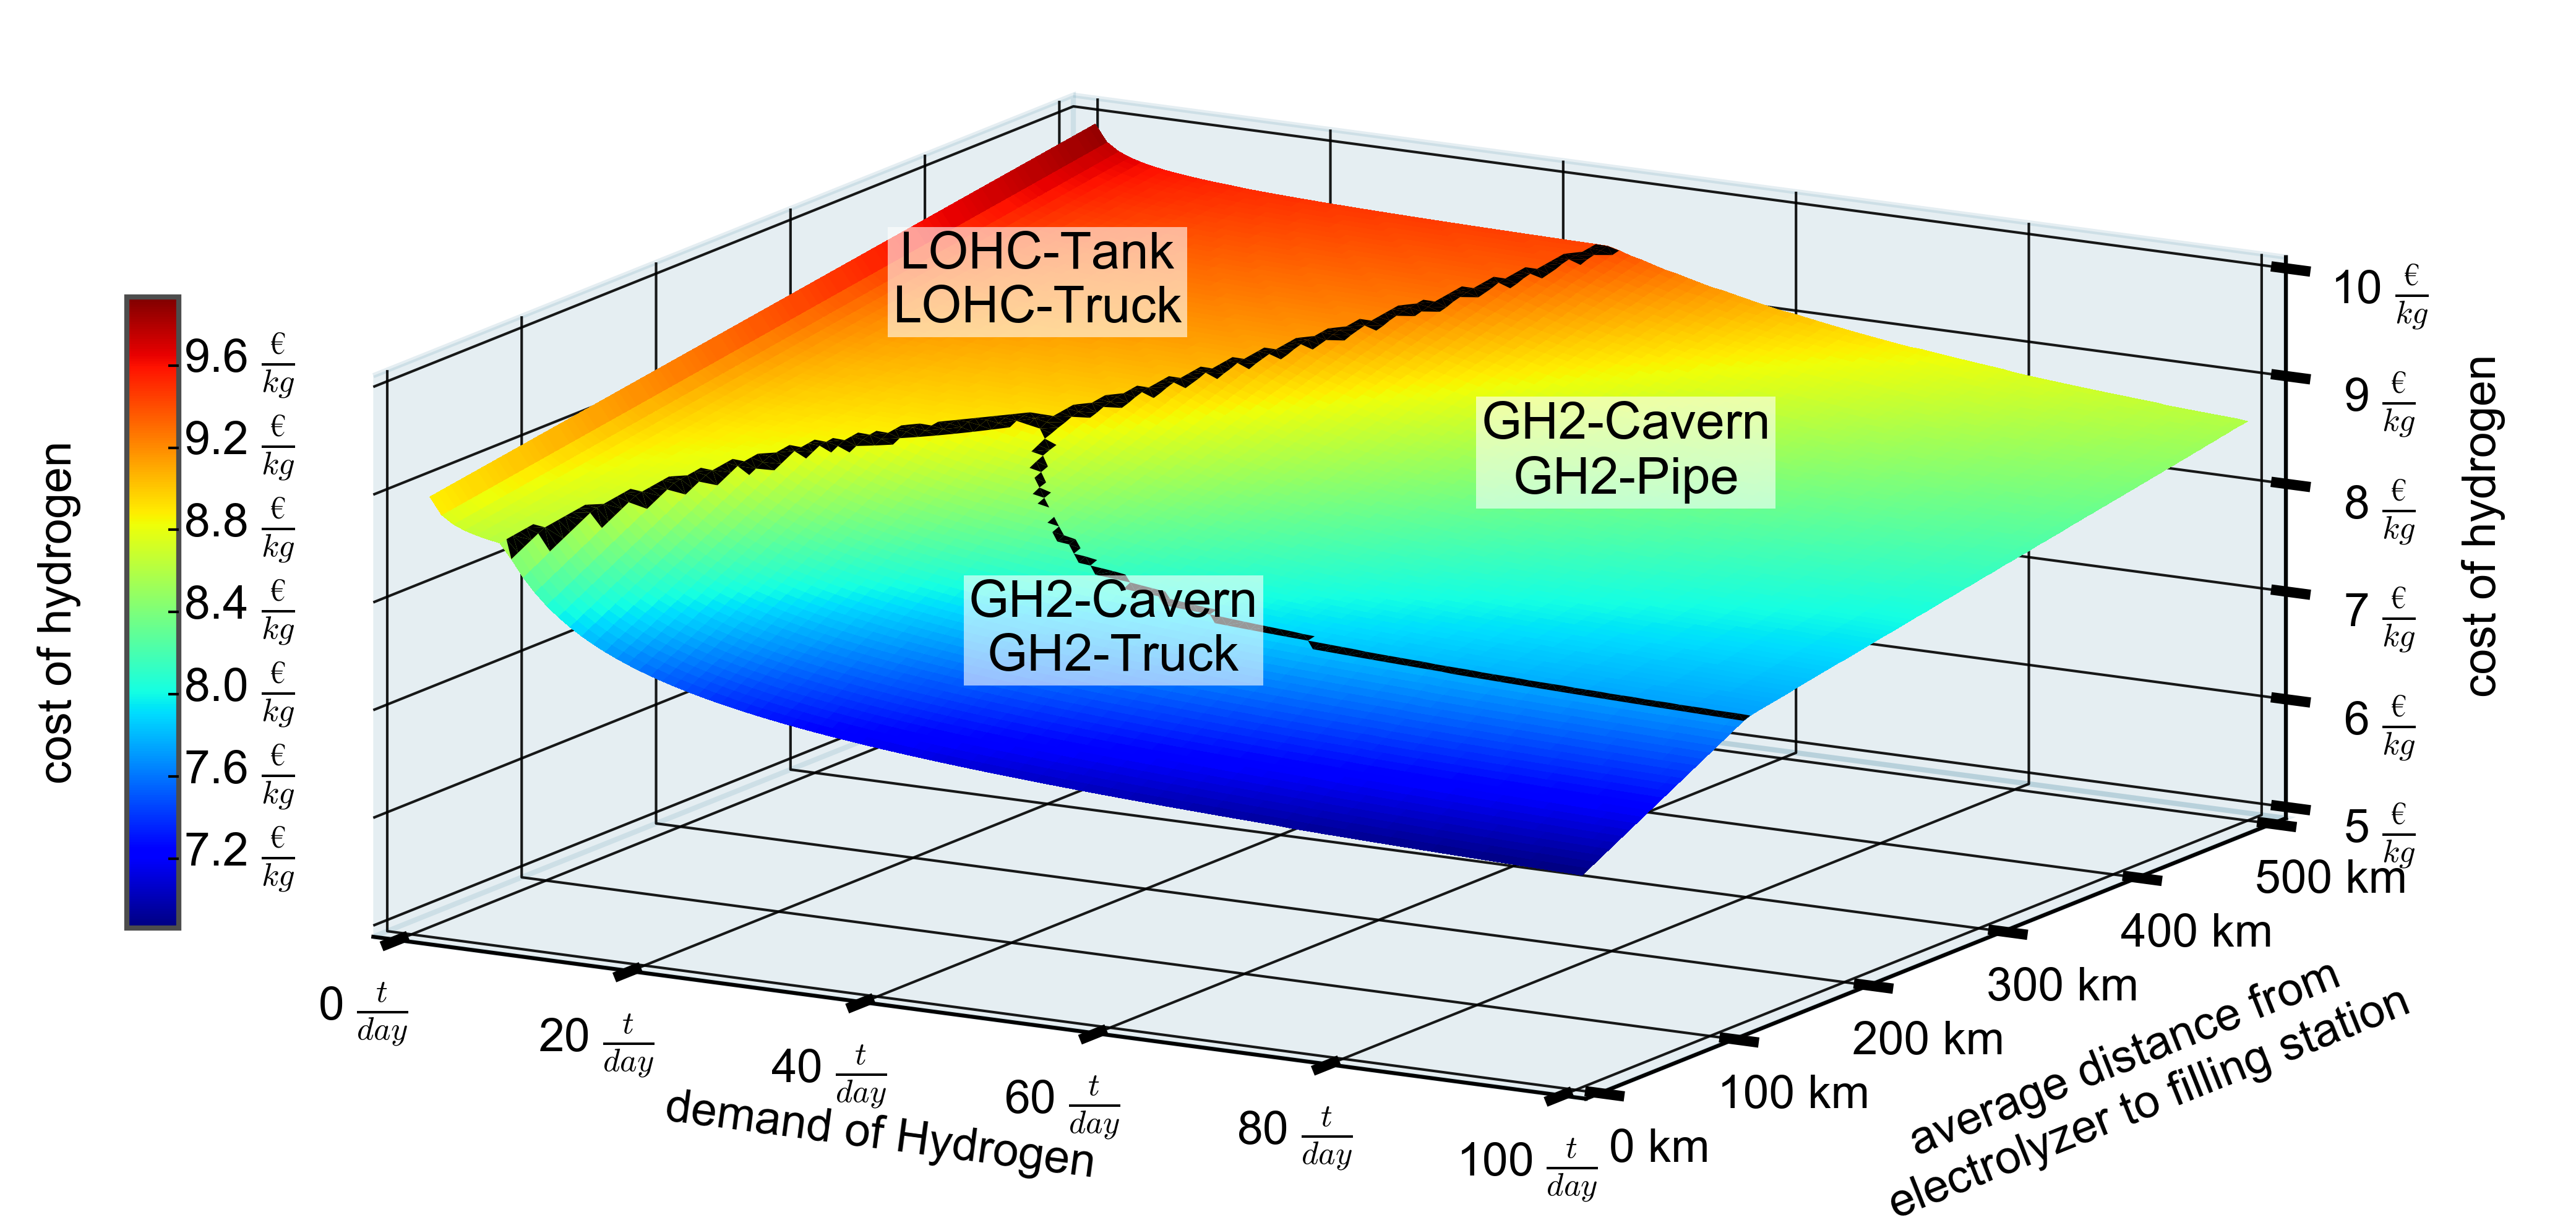

In [7]:
pFun.trisurfplotMin(
    demArr,
    distArr,
    cuttedCost,
    minimalCost,
    minimalLineCost,
    dfHSC,
    figSize=(7,3.4),
    saveFig=True,
    savePath=resultpath,
    saveName="Final_Comparison T=S")

## Conversion between Storage and Distribution
The second phase will exclude GH2-Tanks for seasonal storage since they are too expensive, but include a conversion between Storage and Distribution

In [8]:
# %% Built the Hydrogen Supply Chains
dfHSC = cFun.BuiltHSC(dfTable,
                      conn=0,
                      conversionStorageTransport=True,
                      gTanks=False)

Again some initialization and calculation

In [9]:
# Initialization
totalCost = np.empty((len(distArr), demArr.shape[1], len(dfHSC)))
minimalCost = np.empty((len(distArr), demArr.shape[1]))

# Calculation HSC
for i in range(len(dfHSC)):
    # Module Calculation
    Production, Connector1, Storage, Connector2, Transport, Station = cFun.calcHSC(
        demArr, distArr, dfHSC, dfTable, i)
# Read interesting Numbers
    totalCost[:, :, i] = Station.getTotalCost()
    
# %%Cut disturbing Data
cuttedCost = copy.copy(totalCost)
lineCost = copy.copy(totalCost)
lineCost[:, :, :] = np.nan
minimalLineCost = np.empty((len(distArr), demArr.shape[1]))
minimalLineCost[:, :] = np.nan

for i in range(len(distArr)):
    for j in range(len(demArr.T)):
        minimalCost[i, j] = min(cuttedCost[i, j, :])

        for k in range(len(dfHSC)):
            if minimalCost[i, j] < cuttedCost[i, j, k]:
                cuttedCost[i, j, k] = np.nan
                if (
                    np.isnan(cuttedCost[i, j, k]) and np.isnan(cuttedCost[i - 1, j, k]) == False) or (np.isnan( cuttedCost[i, j, k]) == False and np.isnan(cuttedCost[i - 1, j, k]) == True):
                    if not(i == 0):
                        minimalLineCost[i, j] = minimalCost[i, j]
                        minimalLineCost[i - 1, j] = minimalCost[i - 1, j]
                        minimalLineCost[i, j - 1] = minimalCost[i, j - 1]
                elif (np.isnan(cuttedCost[i, j, k]) and np.isnan(cuttedCost[i, j - 1, k]) == False) or (np.isnan(cuttedCost[i, j, k]) == False and np.isnan(cuttedCost[i, j - 1, k]) == True):
                    if not j == 0:
                        minimalLineCost[i, j] = minimalCost[i, j]
                        minimalLineCost[i - 1, j] = minimalCost[i - 1, j]
                        minimalLineCost[i, j - 1] = minimalCost[i, j - 1]

And the plotting stuff

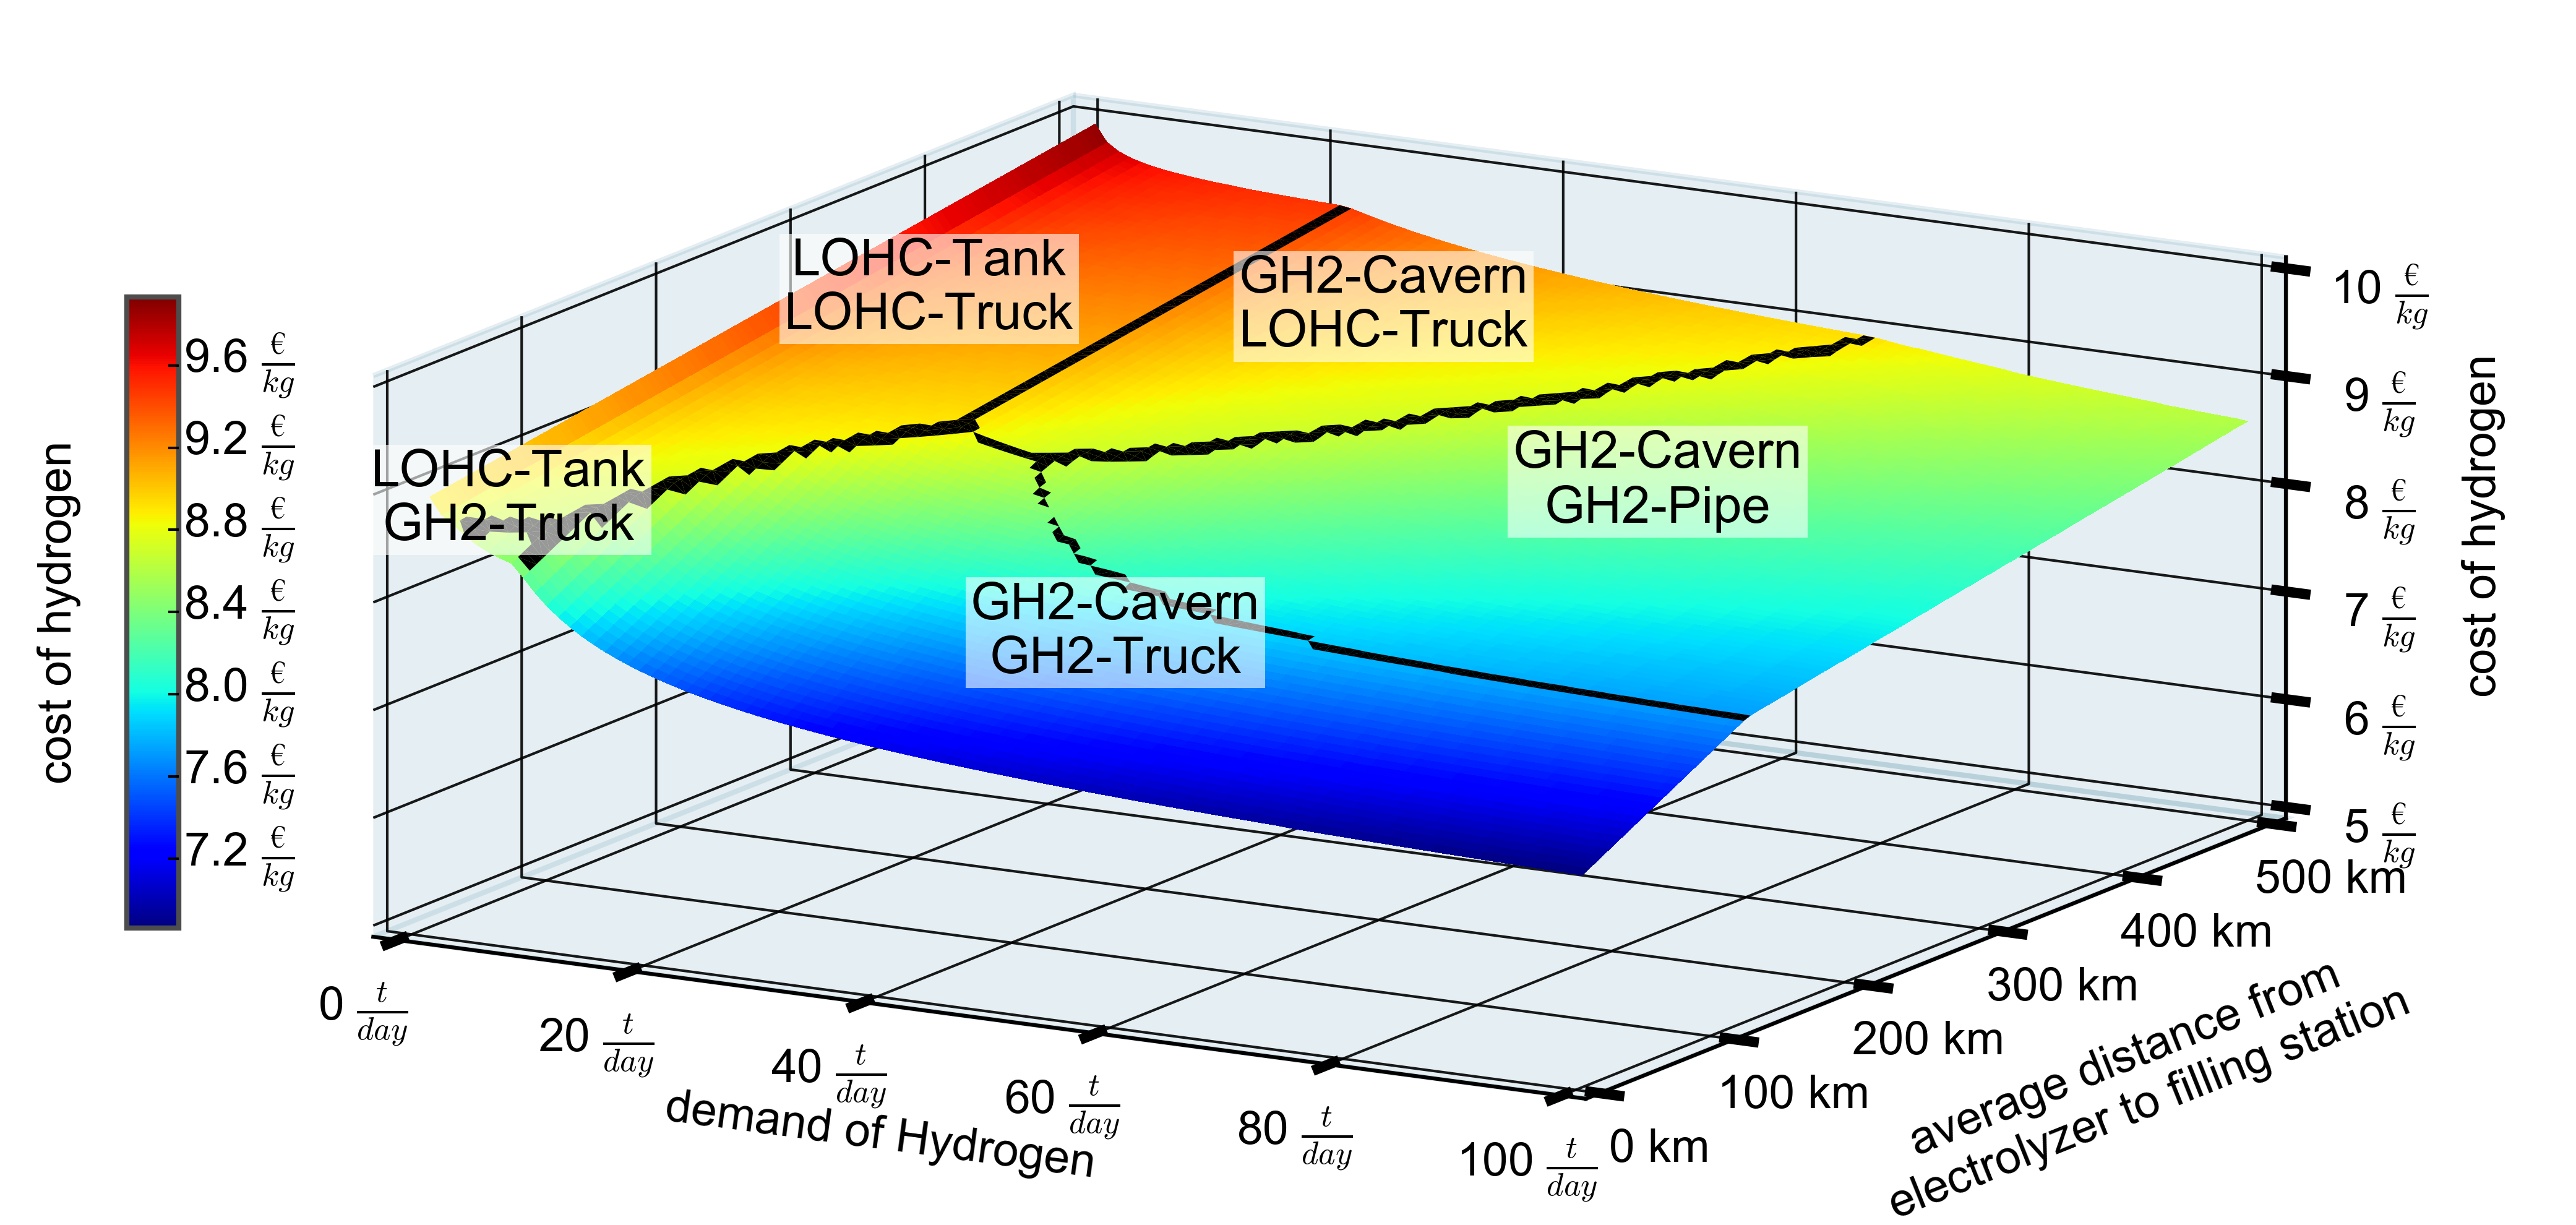

In [10]:
pFun.trisurfplotMin(
    demArr,
    distArr,
    cuttedCost,
    minimalCost,
    minimalLineCost,
    dfHSC,
    figSize=(7,3.4),
    saveFig=True,
    savePath=resultpath,
    saveName="Final_ComparisonNoTank")

## Detailed pathway analyses at 250km and 50 t/day
The following part will show some detailed pathway analyses at 250km distance and 50 t/day demand to elaborate the advantages and disadvantages of different technology components

In [11]:

demMax=50000.        # max demand
distMax=250.       # max distance
res=1.
demArr, distArr = cFun.builtDemDistArray(demMax,        # max demand
                                         distMax,       # max distance
                                         res)           # resolution
fuelDemandFCEV = np.array(([0.76],[0.448])) # kg/100km
listFuelDemand=['Toyota Mirai:\n0.76 kg/100km','JEC FCEV 2020+:\n0.448kg/100km']
LHV_HYDROGEN = 33.32  # kWh/kg
# maximal calculated daily demand in kg/d
# %% Read Parameter from Excel File

### Cost analysis of Storage=Transport
First we investigate the costs for each pathway without conversion between storage and transportation

In [12]:
# %% Built the Hydrogen Supply Chains
dfHSC = cFun.BuiltHSC(dfTable,
                      conn=0,
                      conversionStorageTransport=False,
                      gTanks=True)
technologies=list(dfHSC['General'])

Preprocessing

In [13]:
technologies=list(dfHSC['General'])
steps = ('Production',
         'Connector1',
         'Storage',
         'Connector2',
         'Transport',
         'Station',
         'Total Energy Demand')

stepsSimple = ('Production',
               'Conversion1',
               'Storage',
               'Conversion2',
               'Transport',
               'Station')

energies = ('electricityRES',
            'electricityGrid',
            'Natural Gas',
            'diesel',
            'hydrogen')

energiesNoHydrogen = ('electricityRES',
                      'ElectricityGrid',
                      'Natural Gas',
                      'Diesel')

expenditures = ('CAPEX',
                'fixed OPEX',
                'variable OPEX')


specCO2Emissions = np.array((0.,        # RES
                             0.54,      # grid
                             0.238,     # Natural Gas
                             0.319))    # Diesel

specTotalEnergy = np.array((3.6,     # RES        MJ_Pe/kWh_e
                            10.62,   # grid      MJ_Pe/kWh_e
                            3.96,     # NG         MJ_Pe/kWh_ng
                            4.32))    # Diesel     MJ_Pe/kWh_diesel


In [14]:
energyDemand = np.empty((len(dfHSC),
                         len(steps),
                         len(energies)))
energyDemandNoHydrogen = np.empty((len(dfHSC),
                                   len(energies)))

energyDemandChain = np.empty((len(dfHSC),
                              len(steps)))

chainCost = np.empty((len(dfHSC),len(stepsSimple)))
totalCostVariance = np.empty((len(dfHSC),2))
expenditureCost = np.empty((len(dfHSC), 6, 3))
test = np.empty(len(dfHSC))
CAPEXCost = np.empty(len(dfHSC))
fixOPEXCost = np.empty(len(dfHSC))
varOPEXCost = np.empty(len(dfHSC))

Calculation

In [15]:
for i in range(len(dfHSC)):
    
    Production,Connector1, Storage, Connector2, Transport, Station=cFun.calcHSC(demArr, distArr, dfHSC, dfTable, i)  
    
    energyDemand[i, 5, :] = np.array(Station.getDemand())
    energyDemand[i ,4, :] = np.array(Transport.getDemand())*energyDemand[i, 5, 0]
    energyDemand[i, 3, :] = np.array(Connector2.getDemand()) * energyDemand[i, 4, 0]
    energyDemand[i, 2, :] = np.array(Storage.getDemand()) * energyDemand[i, 3, 0]
    energyDemand[i, 1, :] = np.array(Connector1.getDemand()) * energyDemand[i, 2, 0]
    energyDemand[i, 0, :] = np.array(Production.getDemand()) * energyDemand[i, 1, 0]
    
    #chain cost
    chainCost[i,:]=(Production.getTOTEX(),
                    Connector1.getTOTEX(),
                    Storage.getTOTEX(),
                    Connector2.getTOTEX(),
                    Transport.getTOTEX(),
                    Station.getTOTEX())
#    # Expenditure
    expenditureCost[i, 0, :] = Production.getExpenditures()
    expenditureCost[i, 1, :] = Connector1.getExpenditures()
    expenditureCost[i, 2, :] = Storage.getExpenditures()
    expenditureCost[i, 3, :] = Connector2.getExpenditures()
    expenditureCost[i, 4, :] = Transport.getExpenditures()
    expenditureCost[i, 5, :] = Station.getExpenditures()
    
    Production0,Connector10, Storage0, Connector20, Transport0, Station0=cFun.calcHSC(np.array([[50000.]]), np.array([[50.]]), dfHSC, dfTable, i)  
    totalCostVariance[i,0]=Station0.getTotalCost()
    Production500,Connector1500, Storage500, Connector2500, Transport500, Station500=cFun.calcHSC(np.array([[50000.]]), np.array([[500.]]), dfHSC, dfTable, i)  
    totalCostVariance[i,1]=Station500.getTotalCost()

Postprocessing

In [16]:
dataExpenditures = np.sum(expenditureCost[:, :, :], axis=1)
totalCost = np.array([np.sum(dataExpenditures[:, :], axis=1)]).T
dataExpendituresNormalized = dataExpenditures/totalCost
energyDemandNoHydrogen[:, 1:] = energyDemand[:,5,1:]+energyDemand[:,4,1:]+energyDemand[:,3,1:]+energyDemand[:,2,1:]+energyDemand[:,1,1:]+energyDemand[:,0,1:]
energyDemandChain[:,:] = energyDemand[:,:,1]+energyDemand[:,:,2]+energyDemand[:,:,3]+energyDemand[:,:,4]

energyDemand[:, 6, 1:]=energyDemand[:,5,1:]+energyDemand[:,4,1:]+energyDemand[:,3,1:]+energyDemand[:,2,1:]+energyDemand[:,1,1:]
energyDemand[:, 6, 0] = (energyDemand[:,1,0]-1)*LHV_HYDROGEN
dataDemandNoHydrogen=energyDemandNoHydrogen[:,1:]

dataChain = np.delete(energyDemandChain,6,1)

chainCostEnergy = chainCost/LHV_HYDROGEN
energyCO2Emissions=dataDemandNoHydrogen*specCO2Emissions
dataDemand=energyDemand[:,6,:]
dataDemand=np.roll(dataDemand, 4, axis=1)
n_pathways=len(fixOPEXCost)
plot_x1=1.
plot_x2=0.4
figureSize=([5,plot_x1+plot_x2*n_pathways])

Plotting

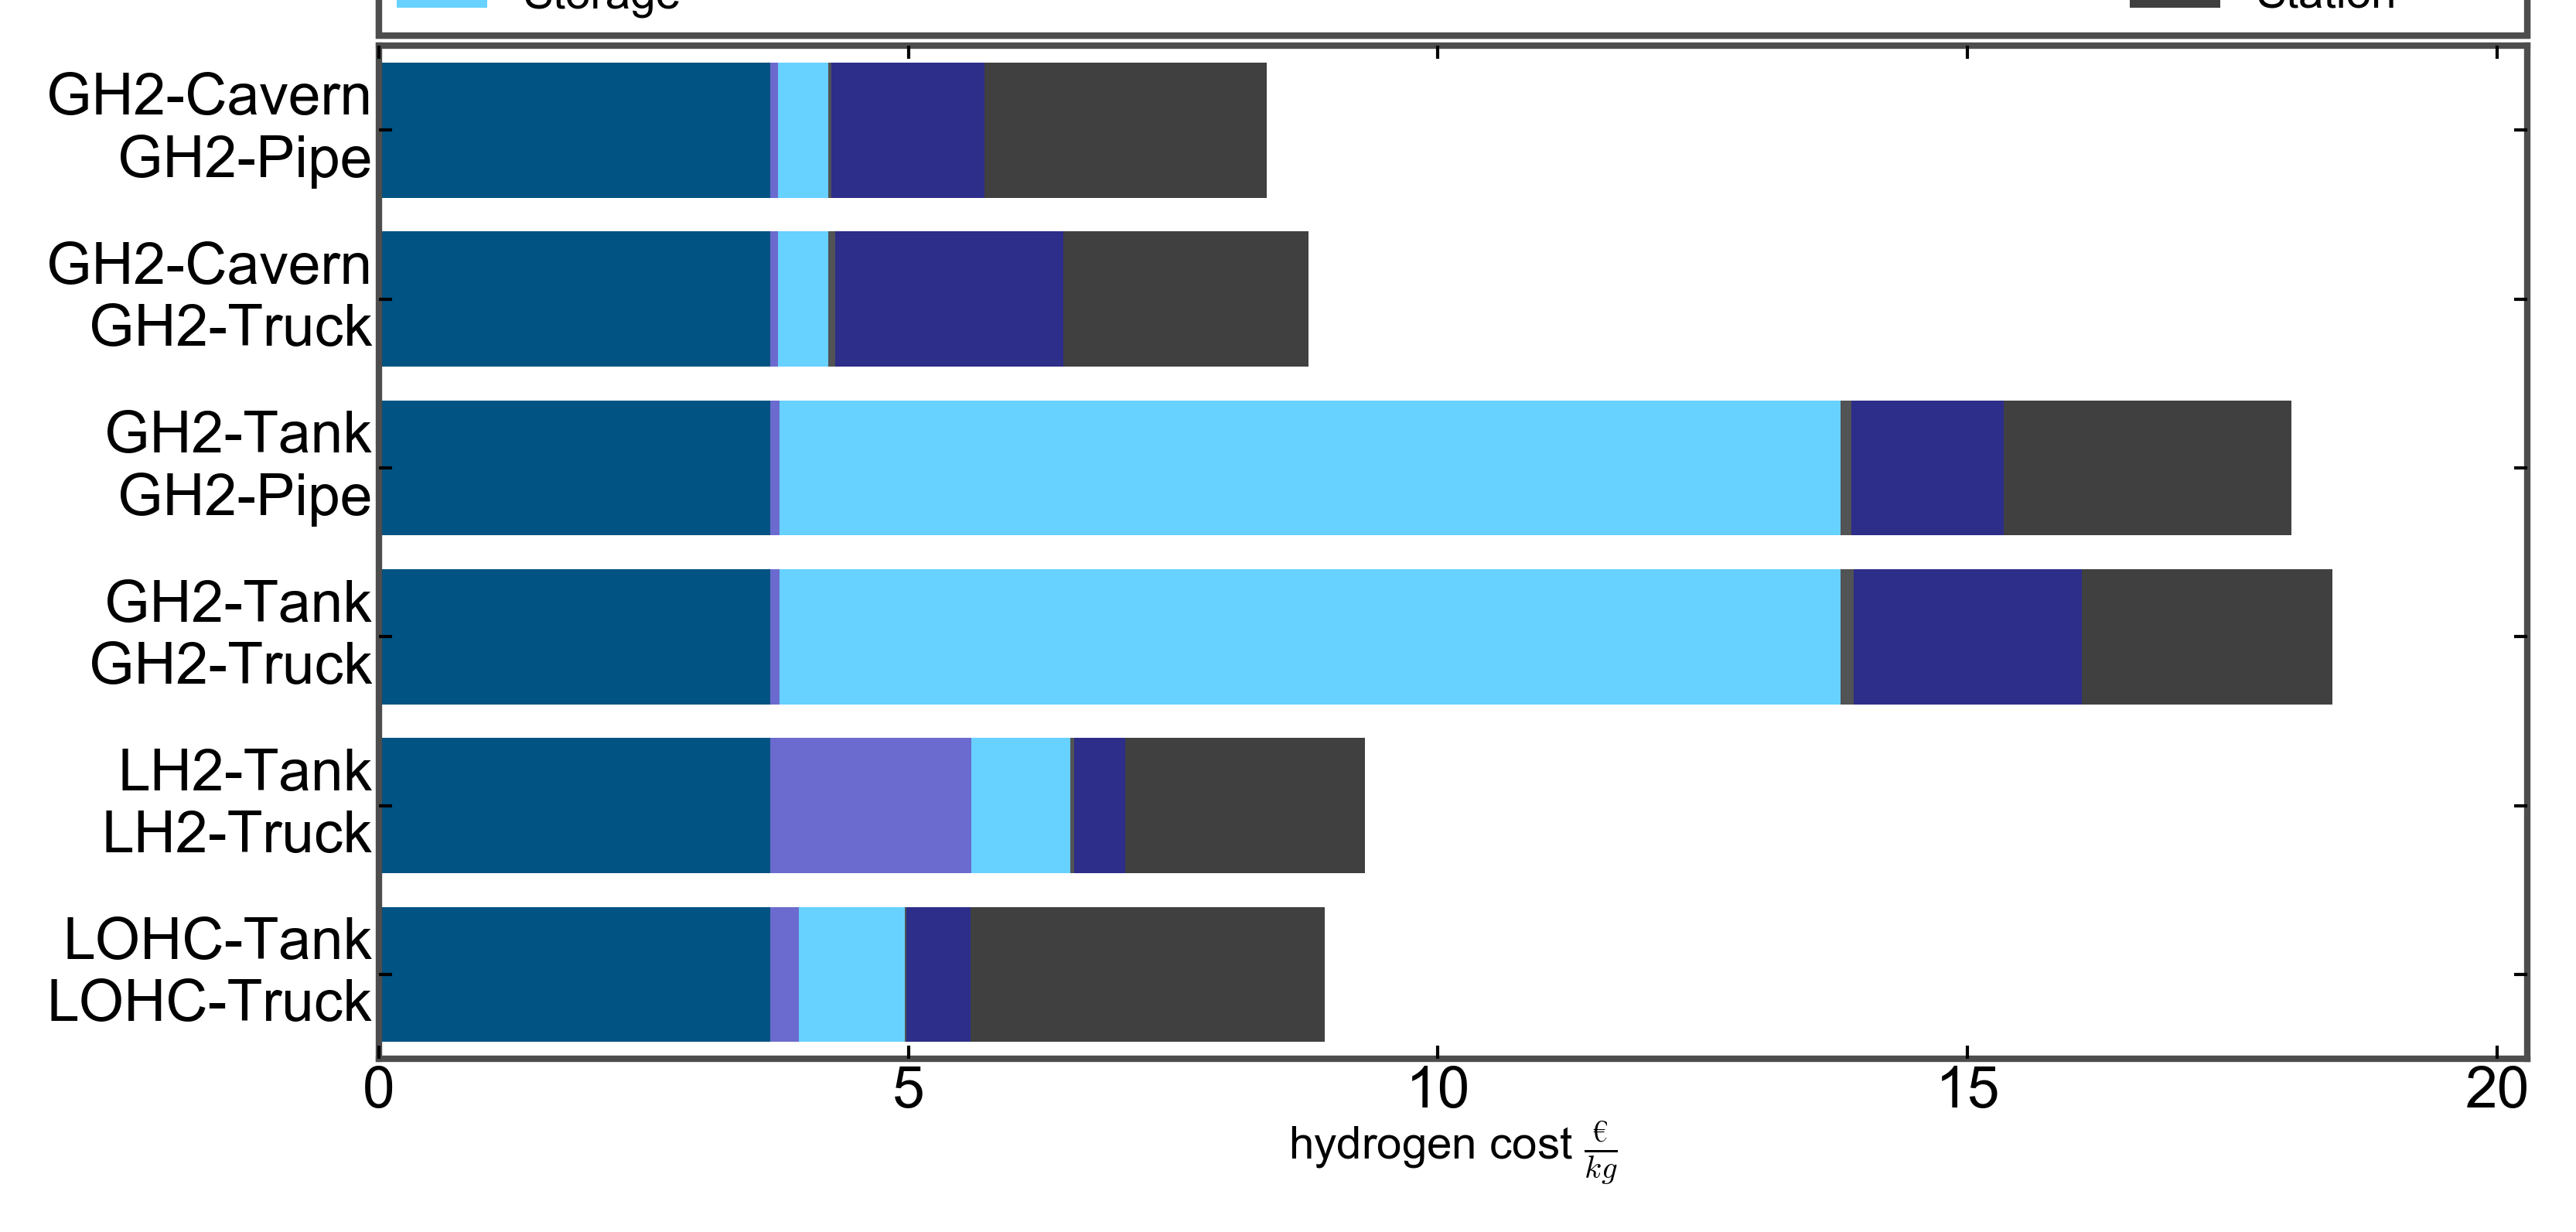

                       Production  Conversion1    Storage  Conversion2  \
GH2-Cavern\nGH2-Pipe     3.700214     0.069247   0.472935     0.033166   
GH2-Cavern\nGH2-Truck    3.700214     0.069247   0.472935     0.069231   
GH2-Tank\nGH2-Pipe       3.700214     0.085679  10.015250     0.098648   
GH2-Tank\nGH2-Truck      3.700214     0.085679  10.015250     0.126600   
LH2-Tank\nLH2-Truck      3.700214     1.894316   0.936587     0.037721   
LOHC-Tank\nLOHC-Truck    3.700214     0.264708   1.001525     0.015048   

                       Transport   Station  
GH2-Cavern\nGH2-Pipe    1.441345  2.669538  
GH2-Cavern\nGH2-Truck   2.152478  2.311891  
GH2-Tank\nGH2-Pipe      1.441345  2.717659  
GH2-Tank\nGH2-Truck     2.152478  2.359971  
LH2-Tank\nLH2-Truck     0.478205  2.265041  
LOHC-Tank\nLOHC-Truck   0.609529  3.341748  


In [17]:
##plot costs in €/kg
pFun.stackedBarChart(chainCost,
                     technologies,
                     stepsSimple,
                     distMax,
                     demMax,
                     title= 'Cost of different chain part',
                     labelTitle=r'hydrogen cost $\frac{€}{kg}$',
                     figSize=figureSize,
                     saveFig=True,
                     savePath=resultpath,
                     saveName='CostComparisonT=S')

CCost1=pd.DataFrame(data=chainCost, index=technologies, columns = stepsSimple)

print(CCost1)

### Pathways Analyses with Conversion between storage and transportation

In [18]:
# %% Built the Hydrogen Supply Chains
dfHSC = cFun.BuiltHSC(dfTable, conn=0)
technologies=list(dfHSC['General'])

Preprocessing

In [19]:
energyDemand = np.empty((len(dfHSC),
                         len(steps),
                         len(energies)))
energyDemandNoHydrogen = np.empty((len(dfHSC),
                                   len(energies)))
energyDemandChain = np.empty((len(dfHSC),
                              len(steps)))
chainCost = np.empty((len(dfHSC),
                      len(stepsSimple)))
totalCostVariance = np.empty((len(dfHSC),
                              2))
expenditureCost = np.empty((len(dfHSC),
                            6, 
                            3))
test = np.empty(len(dfHSC))
CAPEXCost = np.empty(len(dfHSC))
fixOPEXCost = np.empty(len(dfHSC))
varOPEXCost = np.empty(len(dfHSC))

Calculation

In [20]:
for i in range(len(dfHSC)): 
    Production,Connector1, Storage, Connector2, Transport, Station=cFun.calcHSC(demArr, distArr, dfHSC, dfTable, i)  
    # energy demands
    energyDemand[i, 5, :] = np.array(Station.getDemand())
    energyDemand[i ,4, :] = np.array(Transport.getDemand())*energyDemand[i, 5, 0]
    energyDemand[i, 3, :] = np.array(Connector2.getDemand()) * energyDemand[i, 4, 0]
    energyDemand[i, 2, :] = np.array(Storage.getDemand()) * energyDemand[i, 3, 0]
    energyDemand[i, 1, :] = np.array(Connector1.getDemand()) * energyDemand[i, 2, 0]
    energyDemand[i, 0, :] = np.array(Production.getDemand()) * energyDemand[i, 1, 0]
    
    #chain cost
    chainCost[i,:]=(Production.getTOTEX(),
                    Connector1.getTOTEX(),
                    Storage.getTOTEX(),
                    Connector2.getTOTEX(),
                    Transport.getTOTEX(),
                    Station.getTOTEX())
#    # Expenditure
    expenditureCost[i, 0, :] = Production.getExpenditures()
    expenditureCost[i, 1, :] = Connector1.getExpenditures()
    expenditureCost[i, 2, :] = Storage.getExpenditures()
    expenditureCost[i, 3, :] = Connector2.getExpenditures()
    expenditureCost[i, 4, :] = Transport.getExpenditures()
    expenditureCost[i, 5, :] = Station.getExpenditures()
    
    Production0,Connector10, Storage0, Connector20, Transport0, Station0=cFun.calcHSC(np.array([[50000.]]), np.array([[50.]]), dfHSC, dfTable, i)  
    totalCostVariance[i,0]=Station0.getTotalCost()
    Production500,Connector1500, Storage500, Connector2500, Transport500, Station500=cFun.calcHSC(np.array([[50000.]]), np.array([[500.]]), dfHSC, dfTable, i)  
    totalCostVariance[i,1]=Station500.getTotalCost()

Postprocessing

In [21]:
dataExpenditures = np.sum(expenditureCost[:, :, :], axis=1)
totalCost = np.array([np.sum(dataExpenditures[:, :], axis=1)]).T
dataExpendituresNormalized = dataExpenditures/totalCost
energyDemandNoHydrogen[:, 1:] = energyDemand[:,5,1:]+energyDemand[:,4,1:]+energyDemand[:,3,1:]+energyDemand[:,2,1:]+energyDemand[:,1,1:]+energyDemand[:,0,1:]
energyDemandChain[:,:] = energyDemand[:,:,1]+energyDemand[:,:,2]+energyDemand[:,:,3]+energyDemand[:,:,4]

energyDemand[:, 6, 1:]=energyDemand[:,5,1:]+energyDemand[:,4,1:]+energyDemand[:,3,1:]+energyDemand[:,2,1:]+energyDemand[:,1,1:]
energyDemand[:, 6, 0] = (energyDemand[:,1,0]-1)*LHV_HYDROGEN
dataDemandNoHydrogen=energyDemandNoHydrogen[:,1:]

dataChain = np.delete(energyDemandChain,6,1)

dataChainSum = np.sum(dataChain,
                      axis=1)
dataChainEfficiency = LHV_HYDROGEN/dataChainSum
chainCostSum = np.sum(chainCost,
                      axis=1)
chainCostEnergy = chainCost/LHV_HYDROGEN

dataDemand=energyDemand[:,6,:]
dataDemand=np.roll(dataDemand, 4, axis=1)

dataTotalEnergy = dataDemandNoHydrogen*specTotalEnergy  #MJ/kg Hydrogen
dataTotalEnergyWTT = np.sum(dataTotalEnergy, axis=1)  # kg CO2/kg Hydrogen
dataTotalEnergyWTW = (dataTotalEnergyWTT*fuelDemandFCEV).T  # kWh/100 km

energyCO2Emissions=dataDemandNoHydrogen*specCO2Emissions
dataCO2EmissionsWTT = np.sum(energyCO2Emissions, axis=1)  # kg CO2/kg Hydrogen
dataCO2EmissionsWTW = (dataCO2EmissionsWTT*fuelDemandFCEV/100).T  #kg CO2/km

Diesel2010CO2 = 0.145       # kg/km
Diesel2020CO2 = 0.106       # kg/km
Gasoline2010CO2 = 0.185     # kg/km
Gasoline2020CO2 = 0.132     # kg/km
WindHydrogen2020CO2 = 0.007 # kg/km

Diesel2010Energy = 196          # MJ/100km
Diesel2020Energy = 143          # MJ/100km
Gasoline2010Energy = 250        # MJ/100km
Gasoline2020Energy = 178        # MJ/100km
WindHydrogen2020Energy = 101    # MJ/100km

vstackCO2 = np.array(([Diesel2010CO2, Gasoline2010CO2, 0],[Diesel2020CO2, Gasoline2020CO2, WindHydrogen2020CO2])).T

vstackEnergy = np.array(([Diesel2010Energy, Gasoline2010Energy, 0],[Diesel2020Energy,Gasoline2020Energy,WindHydrogen2020Energy])).T                      
                         
dataCO2EmissionsWTW2=1000*np.append(dataCO2EmissionsWTW,
                                    vstackCO2, axis=0)

dataTotalEnergyWTW2 = np.append(dataTotalEnergyWTW,
                                vstackEnergy, axis=0)

listNew=['Diesel',
         'Gasoline',
         'FCEV\n(Wind)']
listWTW=['JEC 2010','JEC 2020+']

technologiesWTW2=np.append(technologies, listNew)
n_pathways=len(fixOPEXCost)
figureSize=([5,plot_x1+plot_x2*n_pathways])

Plotting

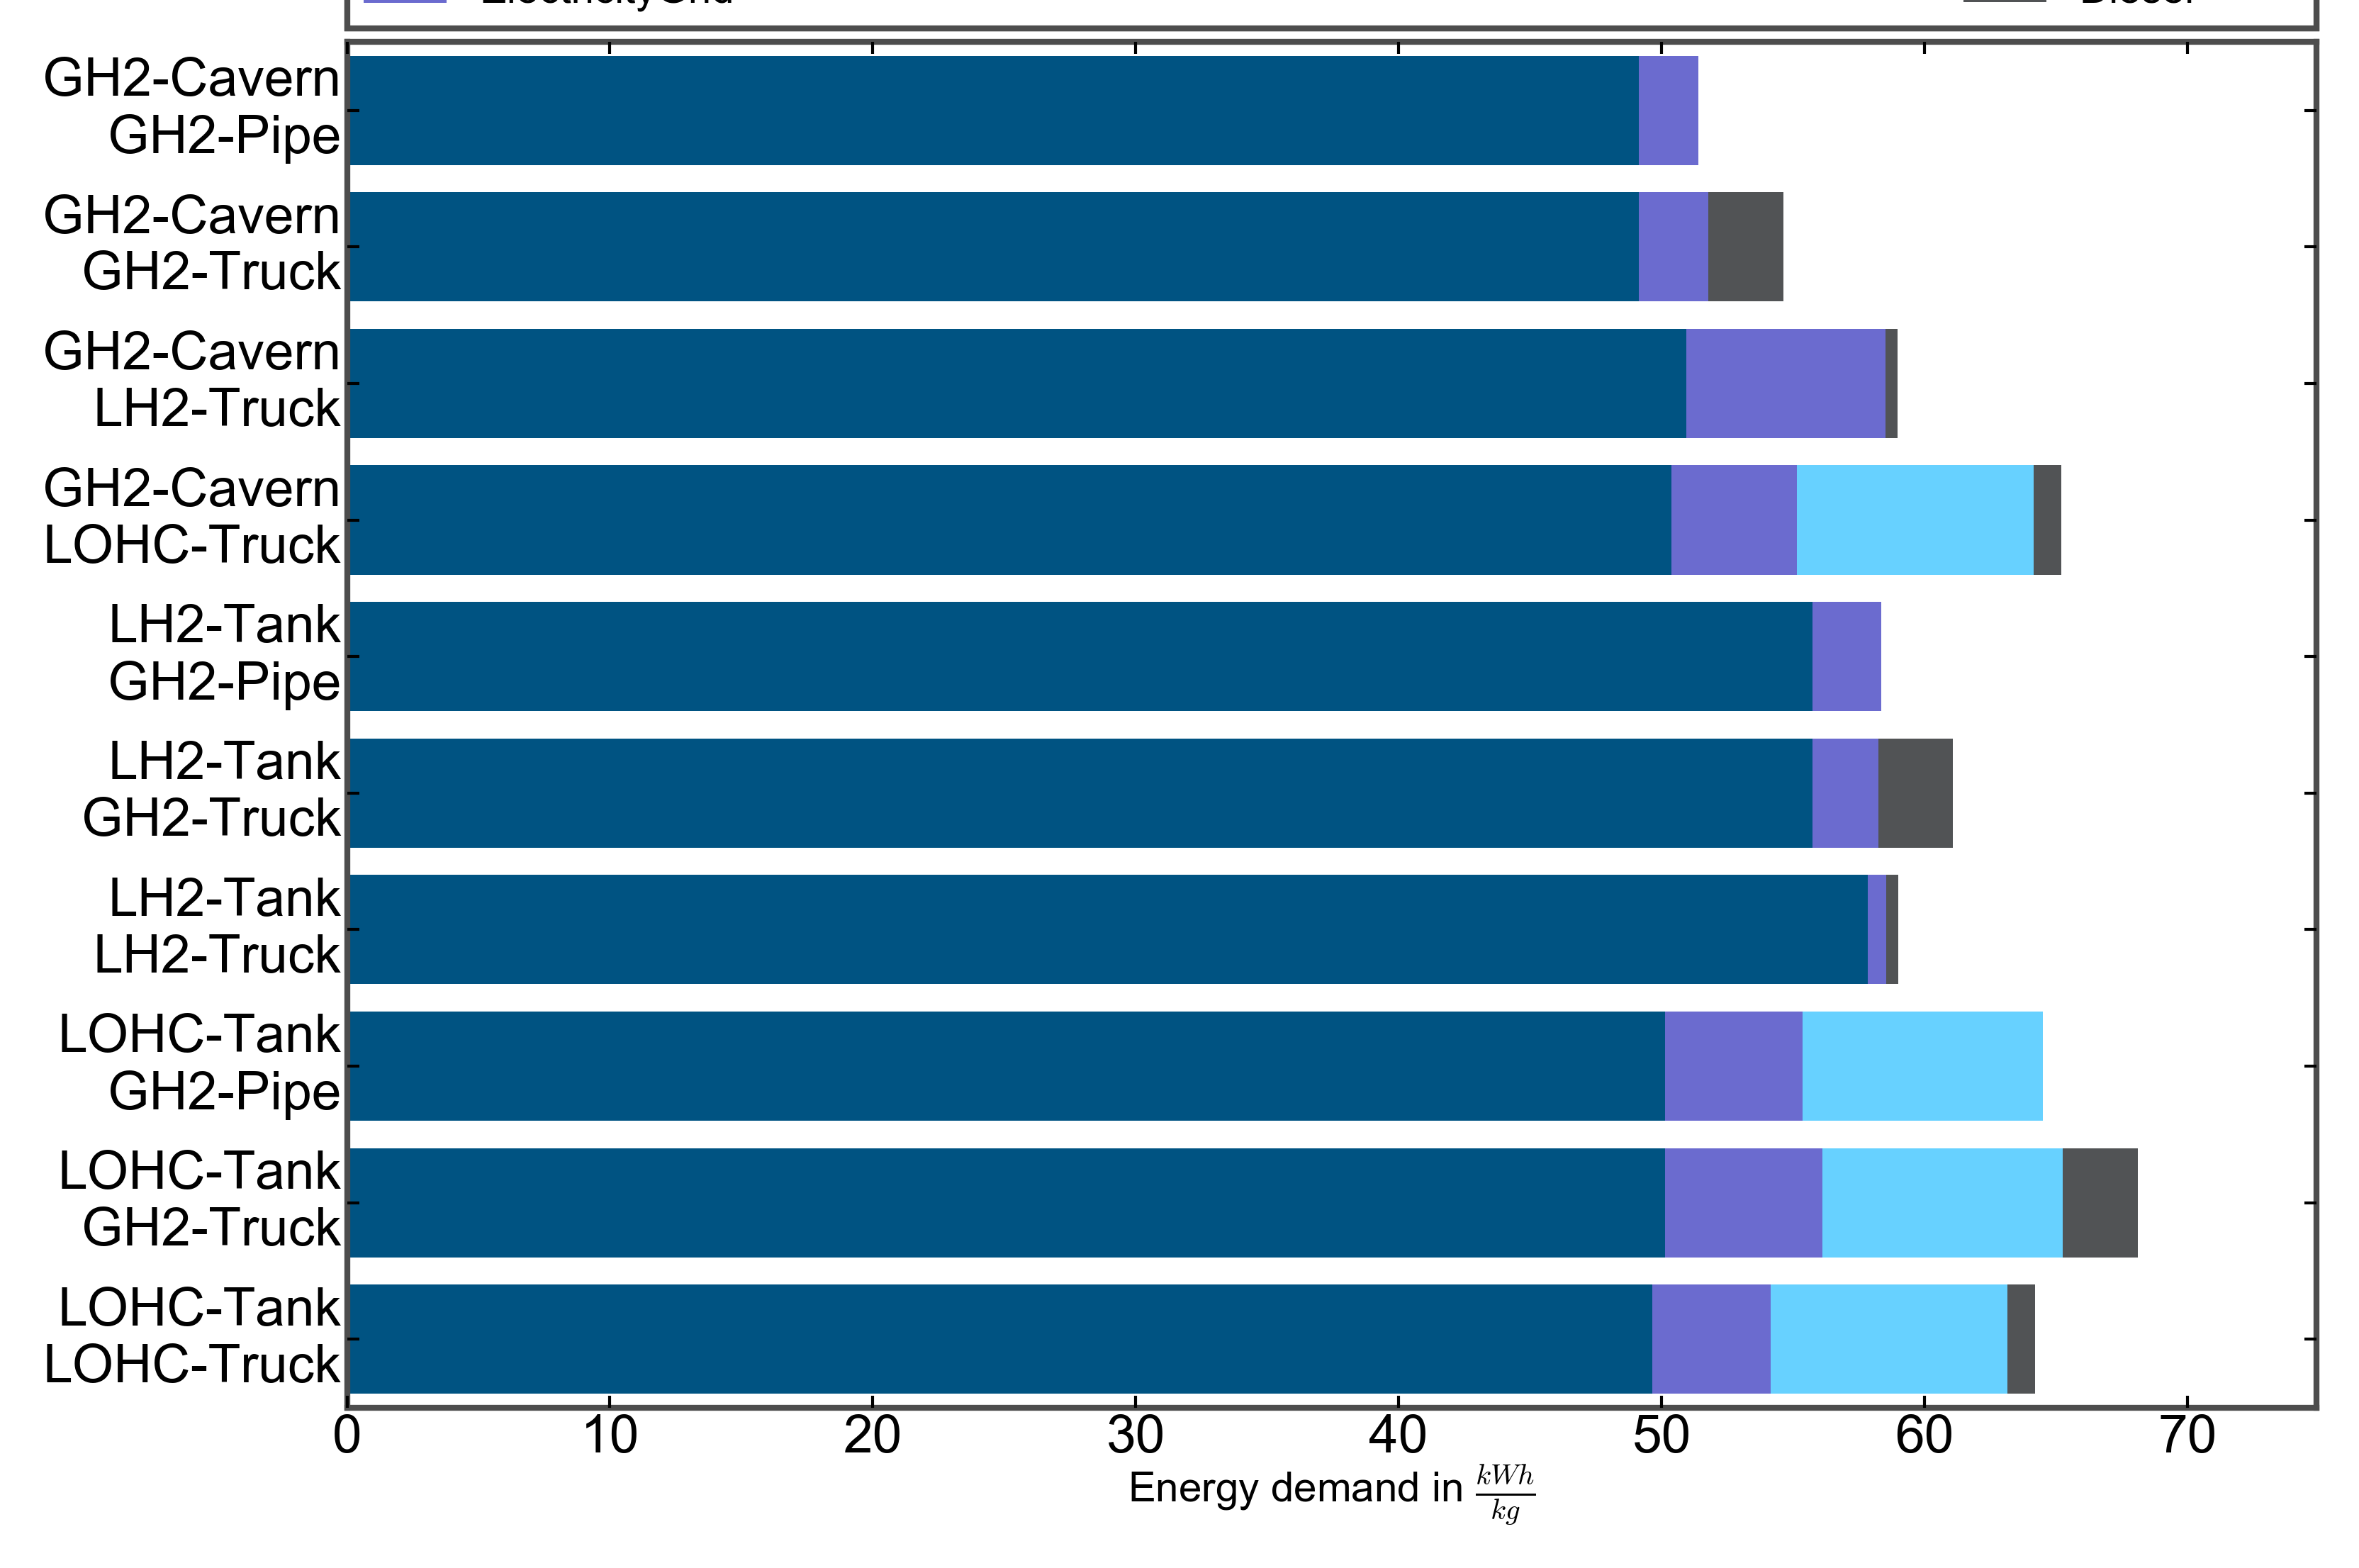

                        electricityRES  ElectricityGrid  Natural Gas    Diesel
GH2-Cavern\nGH2-Pipe         49.142898         2.244554       0.0000  0.000000
GH2-Cavern\nGH2-Truck        49.142898         2.641723       0.0000  2.846250
GH2-Cavern\nLH2-Truck        50.941678         7.583400       0.0000  0.454517
GH2-Cavern\nLOHC-Truck       50.365358         4.771850       9.0000  1.059437
LH2-Tank\nGH2-Pipe           55.740610         2.603000       0.0000  0.000000
LH2-Tank\nGH2-Truck          55.740610         2.503000       0.0000  2.846250
LH2-Tank\nLH2-Truck          57.843129         0.703000       0.0000  0.454517
LOHC-Tank\nGH2-Pipe          50.141440         5.220049       9.1455  0.000000
LOHC-Tank\nGH2-Truck         50.141440         5.970464       9.1455  2.846250
LOHC-Tank\nLOHC-Truck        49.644990         4.500500       9.0000  1.059437


In [22]:
pFun.stackedBarChart(dataDemandNoHydrogen,
                     technologies,
                     energiesNoHydrogen,
                     distMax,
                     demMax,
                     title='Energy Demand for the hydrogen supply chain',
                     labelTitle=r'Energy demand in $\frac{kWh}{kg}$',
                     figSize=figureSize,
                     saveFig=True,
                     savePath=resultpath,
                     saveName="EnergyComparisonNoTank")
Energy2=pd.DataFrame(data=dataDemandNoHydrogen, index=technologies, columns =energiesNoHydrogen)

print(Energy2)

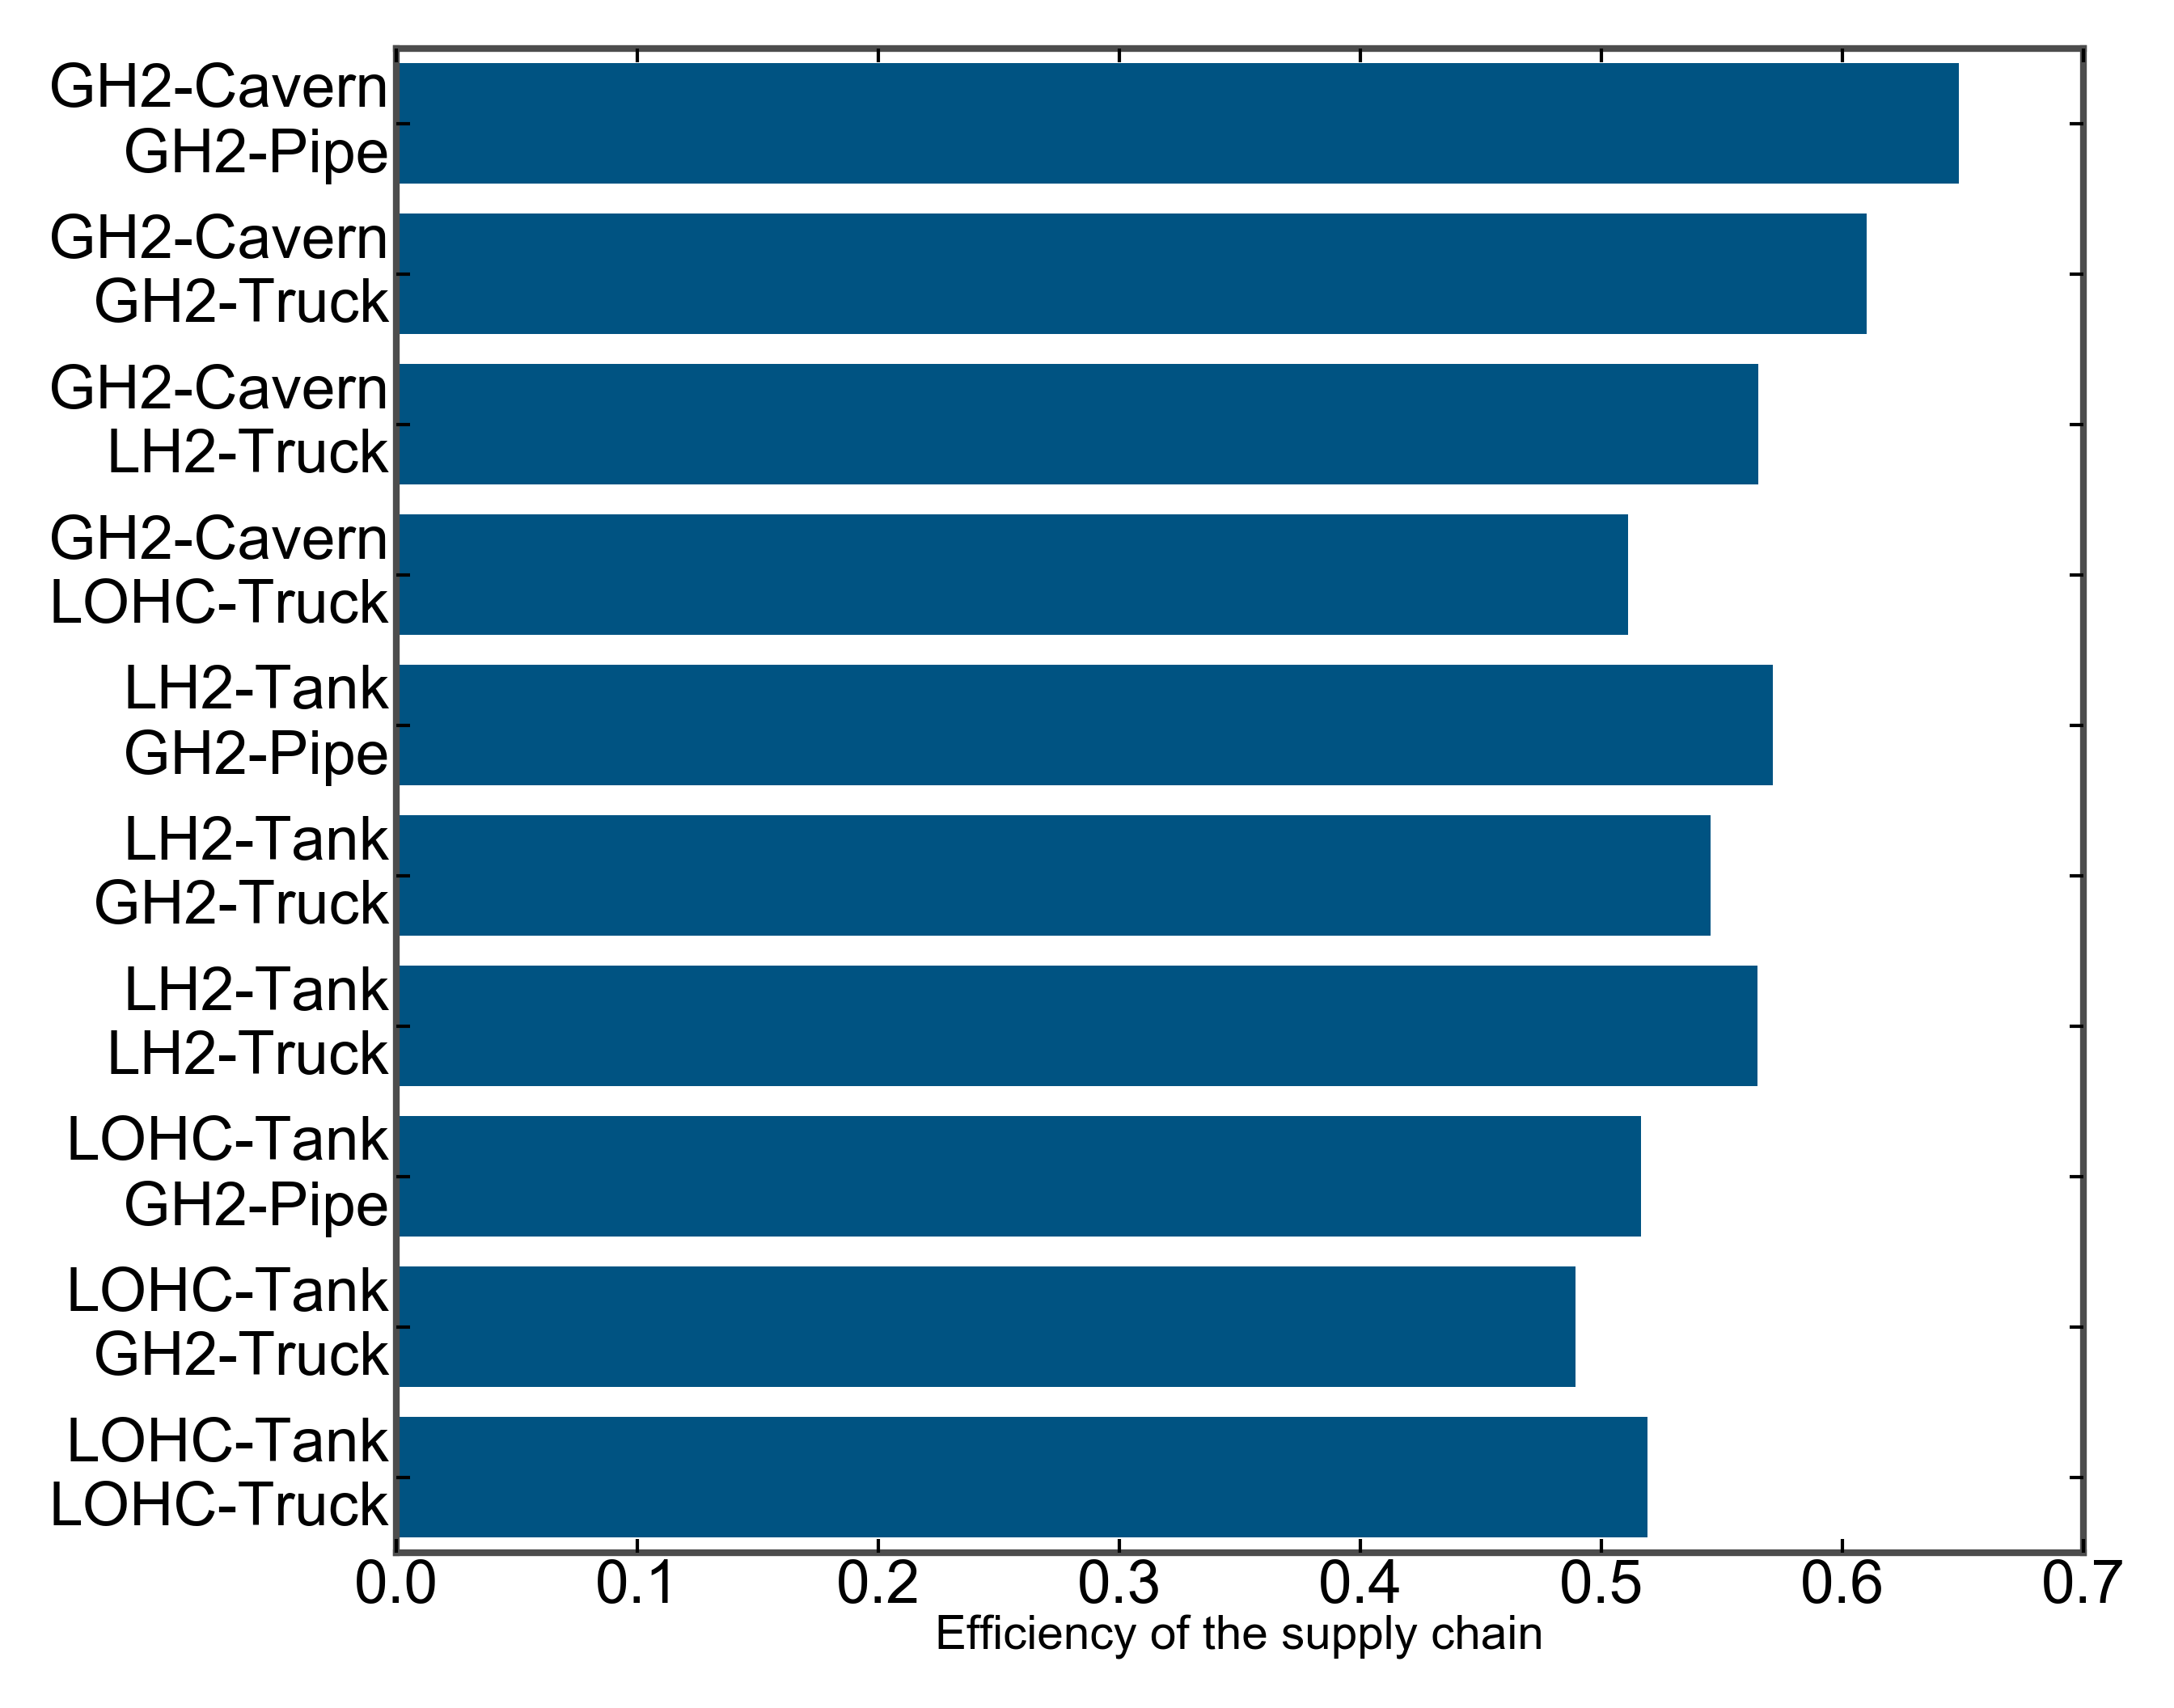

                               0
GH2-Cavern\nGH2-Pipe    0.926296
GH2-Cavern\nGH2-Truck   0.871302
GH2-Cavern\nLH2-Truck   0.807059
GH2-Cavern\nLOHC-Truck  0.730099
LH2-Tank\nGH2-Pipe      0.815856
LH2-Tank\nGH2-Truck     0.779180
LH2-Tank\nLH2-Truck     0.806771
LOHC-Tank\nGH2-Pipe     0.737905
LOHC-Tank\nGH2-Truck    0.698935
LOHC-Tank\nLOHC-Truck   0.741376


In [23]:
# plot efficiency
pFun.chartEmissions(dataChainEfficiency,
                    technologies,
                    distMax,
                    demMax,
                    lableTitle='Efficiency of the supply chain',
                    saveFig=True,
                    savePath=resultpath,
                    saveName="EfficiencyComparisonNoTank")
EffCost2=pd.DataFrame(data=dataChainEfficiency, index=technologies)/0.7

print(EffCost2)

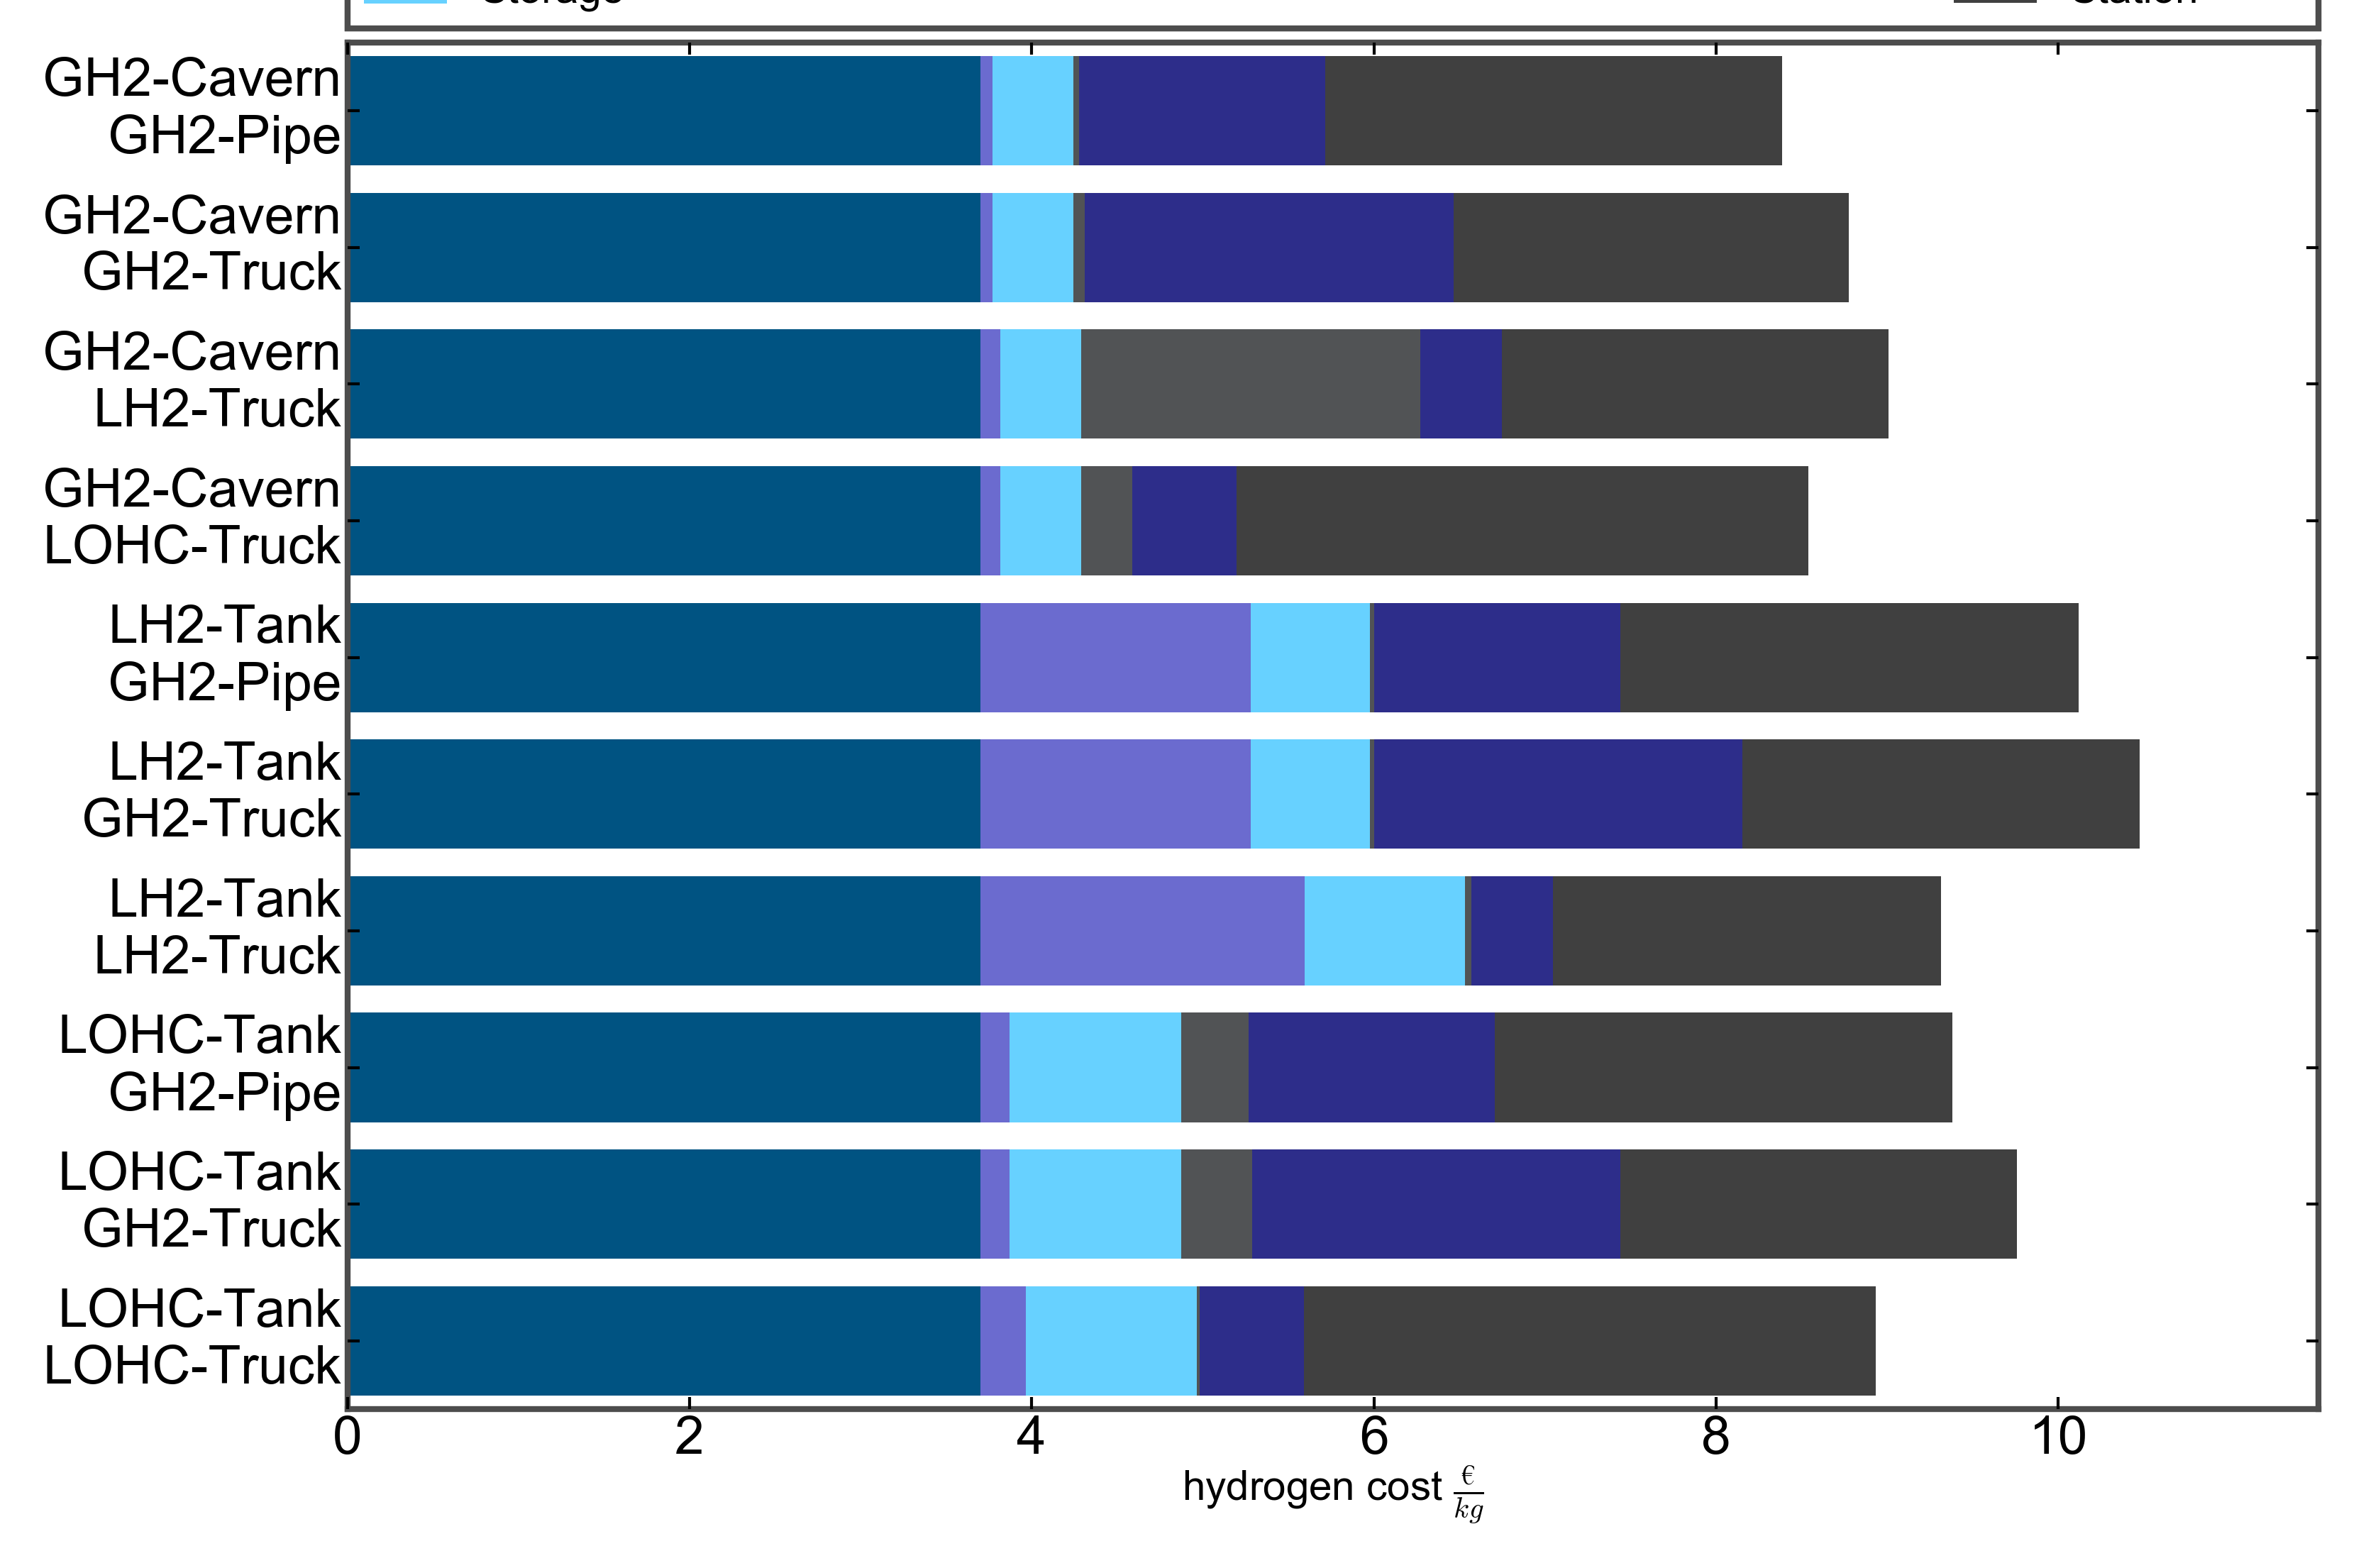

                        Production  Conversion1   Storage  Conversion2  \
GH2-Cavern\nGH2-Pipe      3.700214     0.069247  0.472935     0.033166   
GH2-Cavern\nGH2-Truck     3.700214     0.069247  0.472935     0.069231   
GH2-Cavern\nLH2-Truck     3.700214     0.115834  0.472935     1.982462   
GH2-Cavern\nLOHC-Truck    3.700214     0.116049  0.472935     0.299331   
LH2-Tank\nGH2-Pipe        3.700214     1.578785  0.695937     0.025815   
LH2-Tank\nGH2-Truck       3.700214     1.578785  0.695937     0.025815   
LH2-Tank\nLH2-Truck       3.700214     1.894316  0.936587     0.037721   
LOHC-Tank\nGH2-Pipe       3.700214     0.170941  1.001525     0.393738   
LOHC-Tank\nGH2-Truck      3.700214     0.170941  1.001525     0.416818   
LOHC-Tank\nLOHC-Truck     3.700214     0.264708  1.001525     0.015048   

                        Transport   Station  
GH2-Cavern\nGH2-Pipe     1.441345  2.669538  
GH2-Cavern\nGH2-Truck    2.152478  2.311891  
GH2-Cavern\nLH2-Truck    0.478205  2.256120  
G

In [24]:
##plot costs in €/kg
pFun.stackedBarChart(chainCost,
                     technologies,
                     stepsSimple,
                     distMax,
                     demMax,
                     title= 'Cost of different chain part',
                     labelTitle=r'hydrogen cost $\frac{€}{kg}$',
                     figSize=figureSize,
                     saveFig=True,
                     savePath=resultpath,
                     saveName="CostComparisonNoTank")
CCost2=pd.DataFrame(data=chainCost, index=technologies, columns = stepsSimple)

print(CCost2)

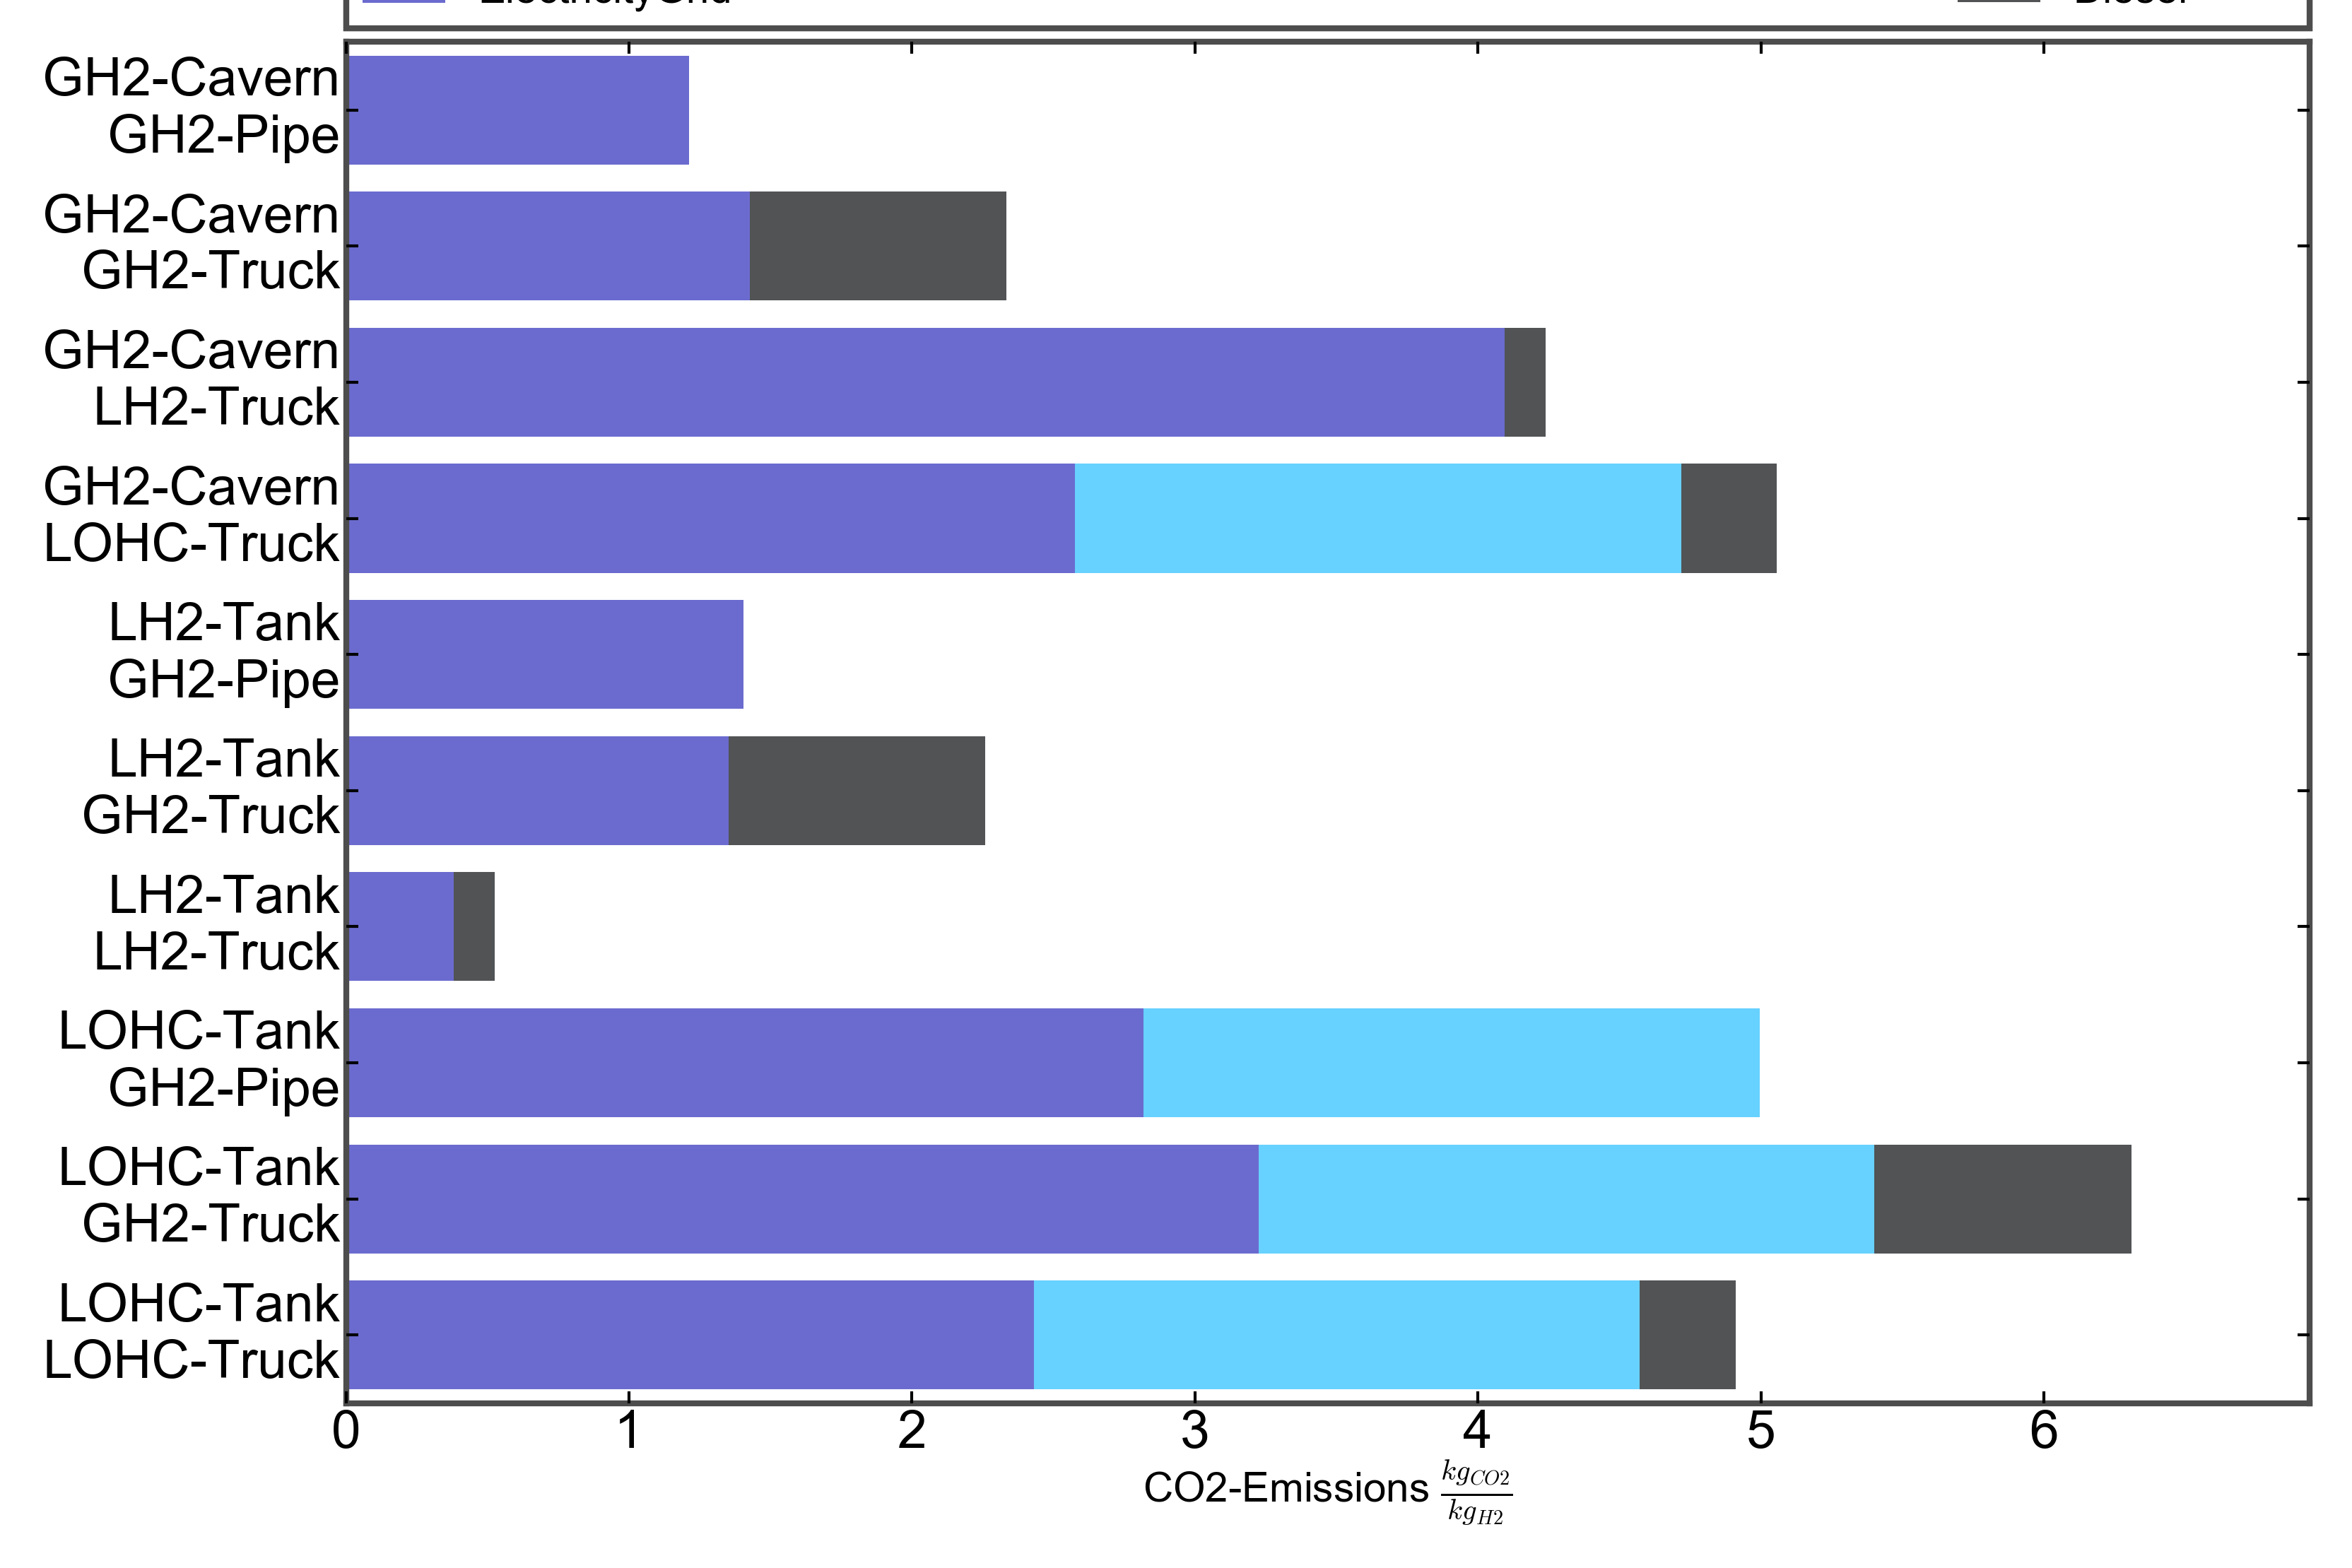

                        electricityRES  ElectricityGrid  Natural Gas    Diesel
GH2-Cavern\nGH2-Pipe               0.0         1.212059     0.000000  0.000000
GH2-Cavern\nGH2-Truck              0.0         1.426530     0.000000  0.907954
GH2-Cavern\nLH2-Truck              0.0         4.095036     0.000000  0.144991
GH2-Cavern\nLOHC-Truck             0.0         2.576799     2.142000  0.337961
LH2-Tank\nGH2-Pipe                 0.0         1.405620     0.000000  0.000000
LH2-Tank\nGH2-Truck                0.0         1.351620     0.000000  0.907954
LH2-Tank\nLH2-Truck                0.0         0.379620     0.000000  0.144991
LOHC-Tank\nGH2-Pipe                0.0         2.818826     2.176629  0.000000
LOHC-Tank\nGH2-Truck               0.0         3.224050     2.176629  0.907954
LOHC-Tank\nLOHC-Truck              0.0         2.430270     2.142000  0.337961


In [25]:
## plot CO2-emissions depending on chain part
pFun.stackedBarChart(energyCO2Emissions,
                     technologies,
                     energiesNoHydrogen,
                     distMax,
                     demMax,
                     title= 'Cost of different chain part',
                     labelTitle=r'CO2-Emissions $\frac{kg_{CO2}}{kg_{H2}}$',
                     figSize=figureSize,
                     saveFig=True,
                     savePath=resultpath,
                     saveName="CO2ComparisonNoTank")
CO2Cost2=pd.DataFrame(data=energyCO2Emissions, index=technologies, columns = energiesNoHydrogen)

print(CO2Cost2)

Well to Wheel Analysis

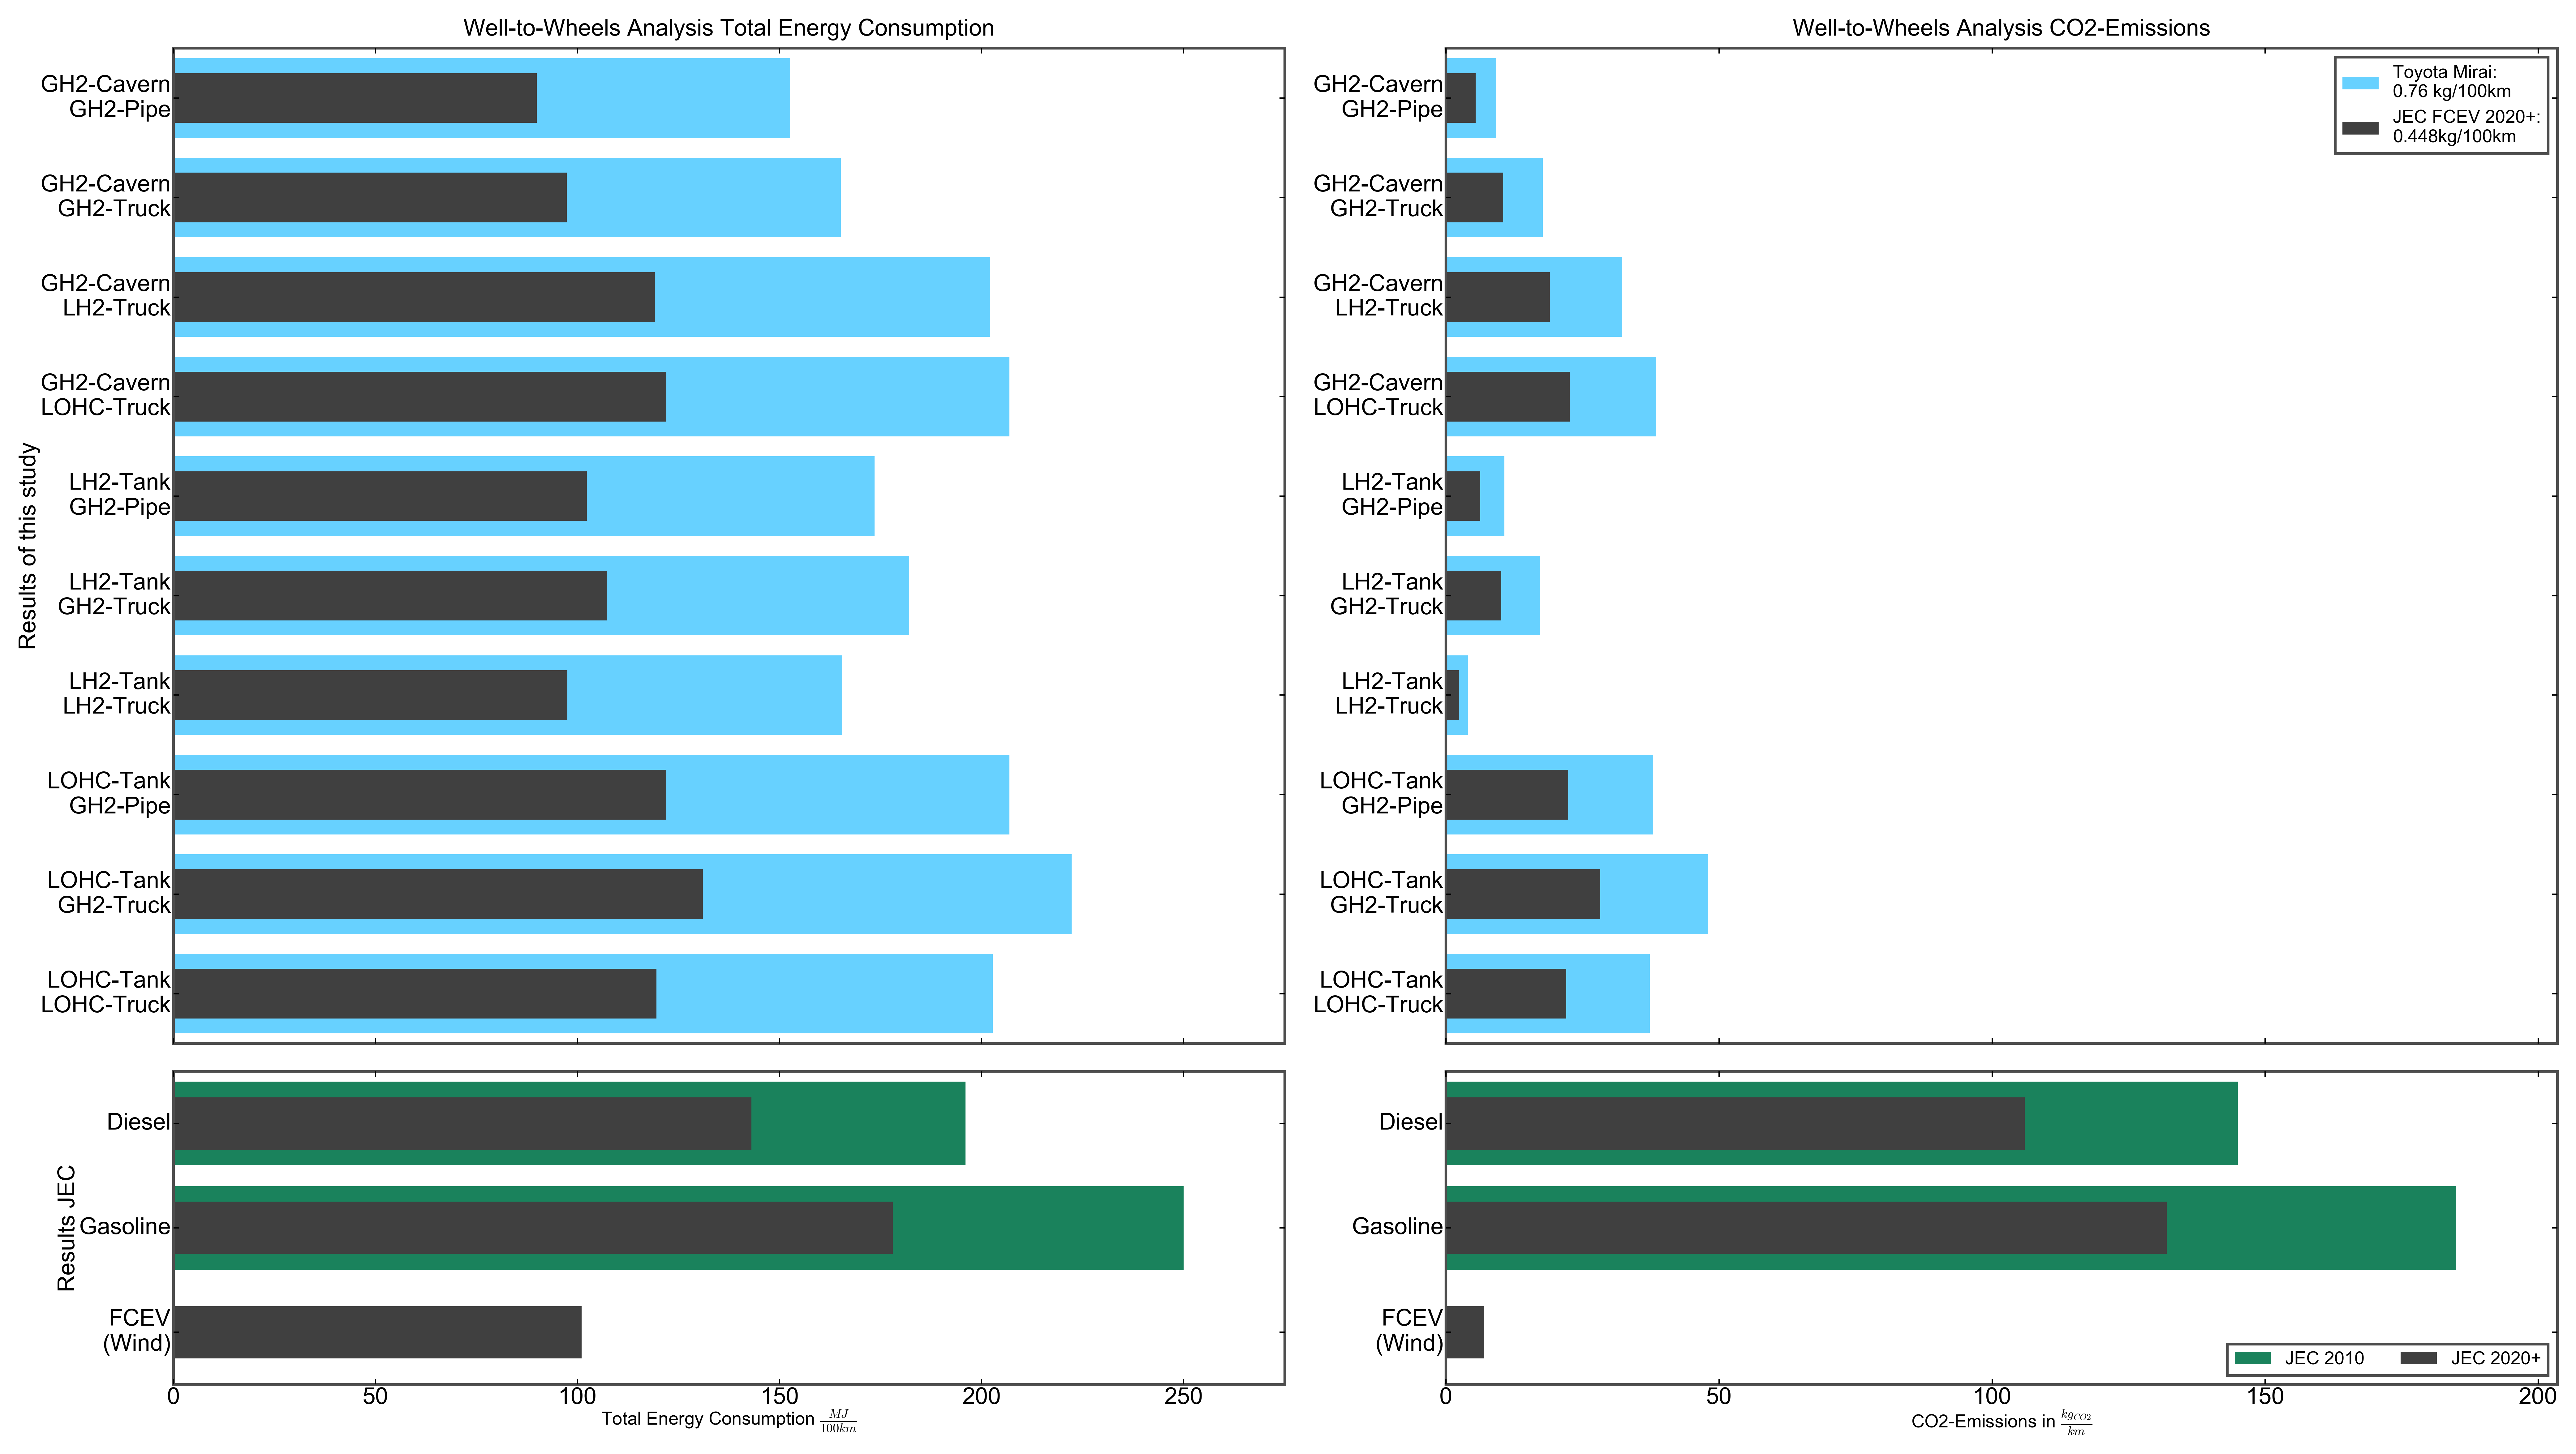

In [26]:
pFun.wellToWheelTotal(dataCO2EmissionsWTW*1000,
                      dataTotalEnergyWTW,
                      technologies,
                      listFuelDemand,
                      vstackCO2*1000,
                      vstackEnergy,
                      listNew,
                      listWTW,
                      distMax,
                      demMax,
                      figSize=(14,8),
                      saveFig=True,
                      savePath=resultpath,
                      saveName="WellToWheelAnalysis") 

## LOHC Station Variation

In [27]:
# %% Built the Hydrogen Supply Chains
dfHSC = cFun.BuiltHSC(dfTable,
                      conn=0,
                      conversionStorageTransport=False,
                      cavern=True,
                      gTanks=False,             
                      LOHCStationVariation=True)
technologies=list(dfHSC['General'])

Preprocessing

In [28]:
# %% HSC dependent Preprocessing

energyDemand = np.empty((len(dfHSC),
                         len(steps),
                         len(energies)))
energyDemandNoHydrogen = np.empty((len(dfHSC),
                                   len(energies)))

energyDemandChain = np.empty((len(dfHSC),
                              len(steps)))

chainCost = np.empty((len(dfHSC),len(stepsSimple)))
totalCostVariance = np.empty((len(dfHSC),2))
expenditureCost = np.empty((len(dfHSC), 6, 3))
test = np.empty(len(dfHSC))
CAPEXCost = np.empty(len(dfHSC))
fixOPEXCost = np.empty(len(dfHSC))
varOPEXCost = np.empty(len(dfHSC))

Calculation

In [29]:
for i in range(len(dfHSC)):
    # Module Calculation    
    Production,Connector1, Storage, Connector2, Transport, Station=cFun.calcHSC(demArr, distArr, dfHSC, dfTable, i)  
    # energy demands
    energyDemand[i, 5, :] = np.array(Station.getDemand())
    energyDemand[i ,4, :] = np.array(Transport.getDemand())*energyDemand[i, 5, 0]
    energyDemand[i, 3, :] = np.array(Connector2.getDemand()) * energyDemand[i, 4, 0]
    energyDemand[i, 2, :] = np.array(Storage.getDemand()) * energyDemand[i, 3, 0]
    energyDemand[i, 1, :] = np.array(Connector1.getDemand()) * energyDemand[i, 2, 0]
    energyDemand[i, 0, :] = np.array(Production.getDemand()) * energyDemand[i, 1, 0]
    
    #chain cost
    chainCost[i,:]=(Production.getTOTEX(),
                    Connector1.getTOTEX(),
                    Storage.getTOTEX(),
                    Connector2.getTOTEX(),
                    Transport.getTOTEX(),
                    Station.getTOTEX())
#    # Expenditure
    expenditureCost[i, 0, :] = Production.getExpenditures()
    expenditureCost[i, 1, :] = Connector1.getExpenditures()
    expenditureCost[i, 2, :] = Storage.getExpenditures()
    expenditureCost[i, 3, :] = Connector2.getExpenditures()
    expenditureCost[i, 4, :] = Transport.getExpenditures()
    expenditureCost[i, 5, :] = Station.getExpenditures()
    
    Production0,Connector10, Storage0, Connector20, Transport0, Station0=cFun.calcHSC(np.array([[50000.]]), np.array([[50.]]), dfHSC, dfTable, i)  
    totalCostVariance[i,0]=Station0.getTotalCost()
    Production500,Connector1500, Storage500, Connector2500, Transport500, Station500=cFun.calcHSC(np.array([[50000.]]), np.array([[500.]]), dfHSC, dfTable, i)  
    totalCostVariance[i,1]=Station500.getTotalCost()

Postprocessing

In [30]:
dataExpenditures = np.sum(expenditureCost[:, :, :], axis=1)
totalCost = np.array([np.sum(dataExpenditures[:, :], axis=1)]).T
dataExpendituresNormalized = dataExpenditures/totalCost
energyDemandNoHydrogen[:, 1:] = energyDemand[:,5,1:]+energyDemand[:,4,1:]+energyDemand[:,3,1:]+energyDemand[:,2,1:]+energyDemand[:,1,1:]+energyDemand[:,0,1:]
energyDemandChain[:,:] = energyDemand[:,:,1]+energyDemand[:,:,2]+energyDemand[:,:,3]+energyDemand[:,:,4]

energyDemand[:, 6, 1:]=energyDemand[:,5,1:]+energyDemand[:,4,1:]+energyDemand[:,3,1:]+energyDemand[:,2,1:]+energyDemand[:,1,1:]
energyDemand[:, 6, 0] = (energyDemand[:,1,0]-1)*LHV_HYDROGEN
dataDemandNoHydrogen=energyDemandNoHydrogen[:,1:]

dataChain = np.delete(energyDemandChain,6,1)

chainCostEnergy = chainCost/LHV_HYDROGEN
energyCO2Emissions=dataDemandNoHydrogen*specCO2Emissions
dataDemand=energyDemand[:,6,:]
dataDemand=np.roll(dataDemand, 4, axis=1)
n_pathways=len(fixOPEXCost)

Plotting

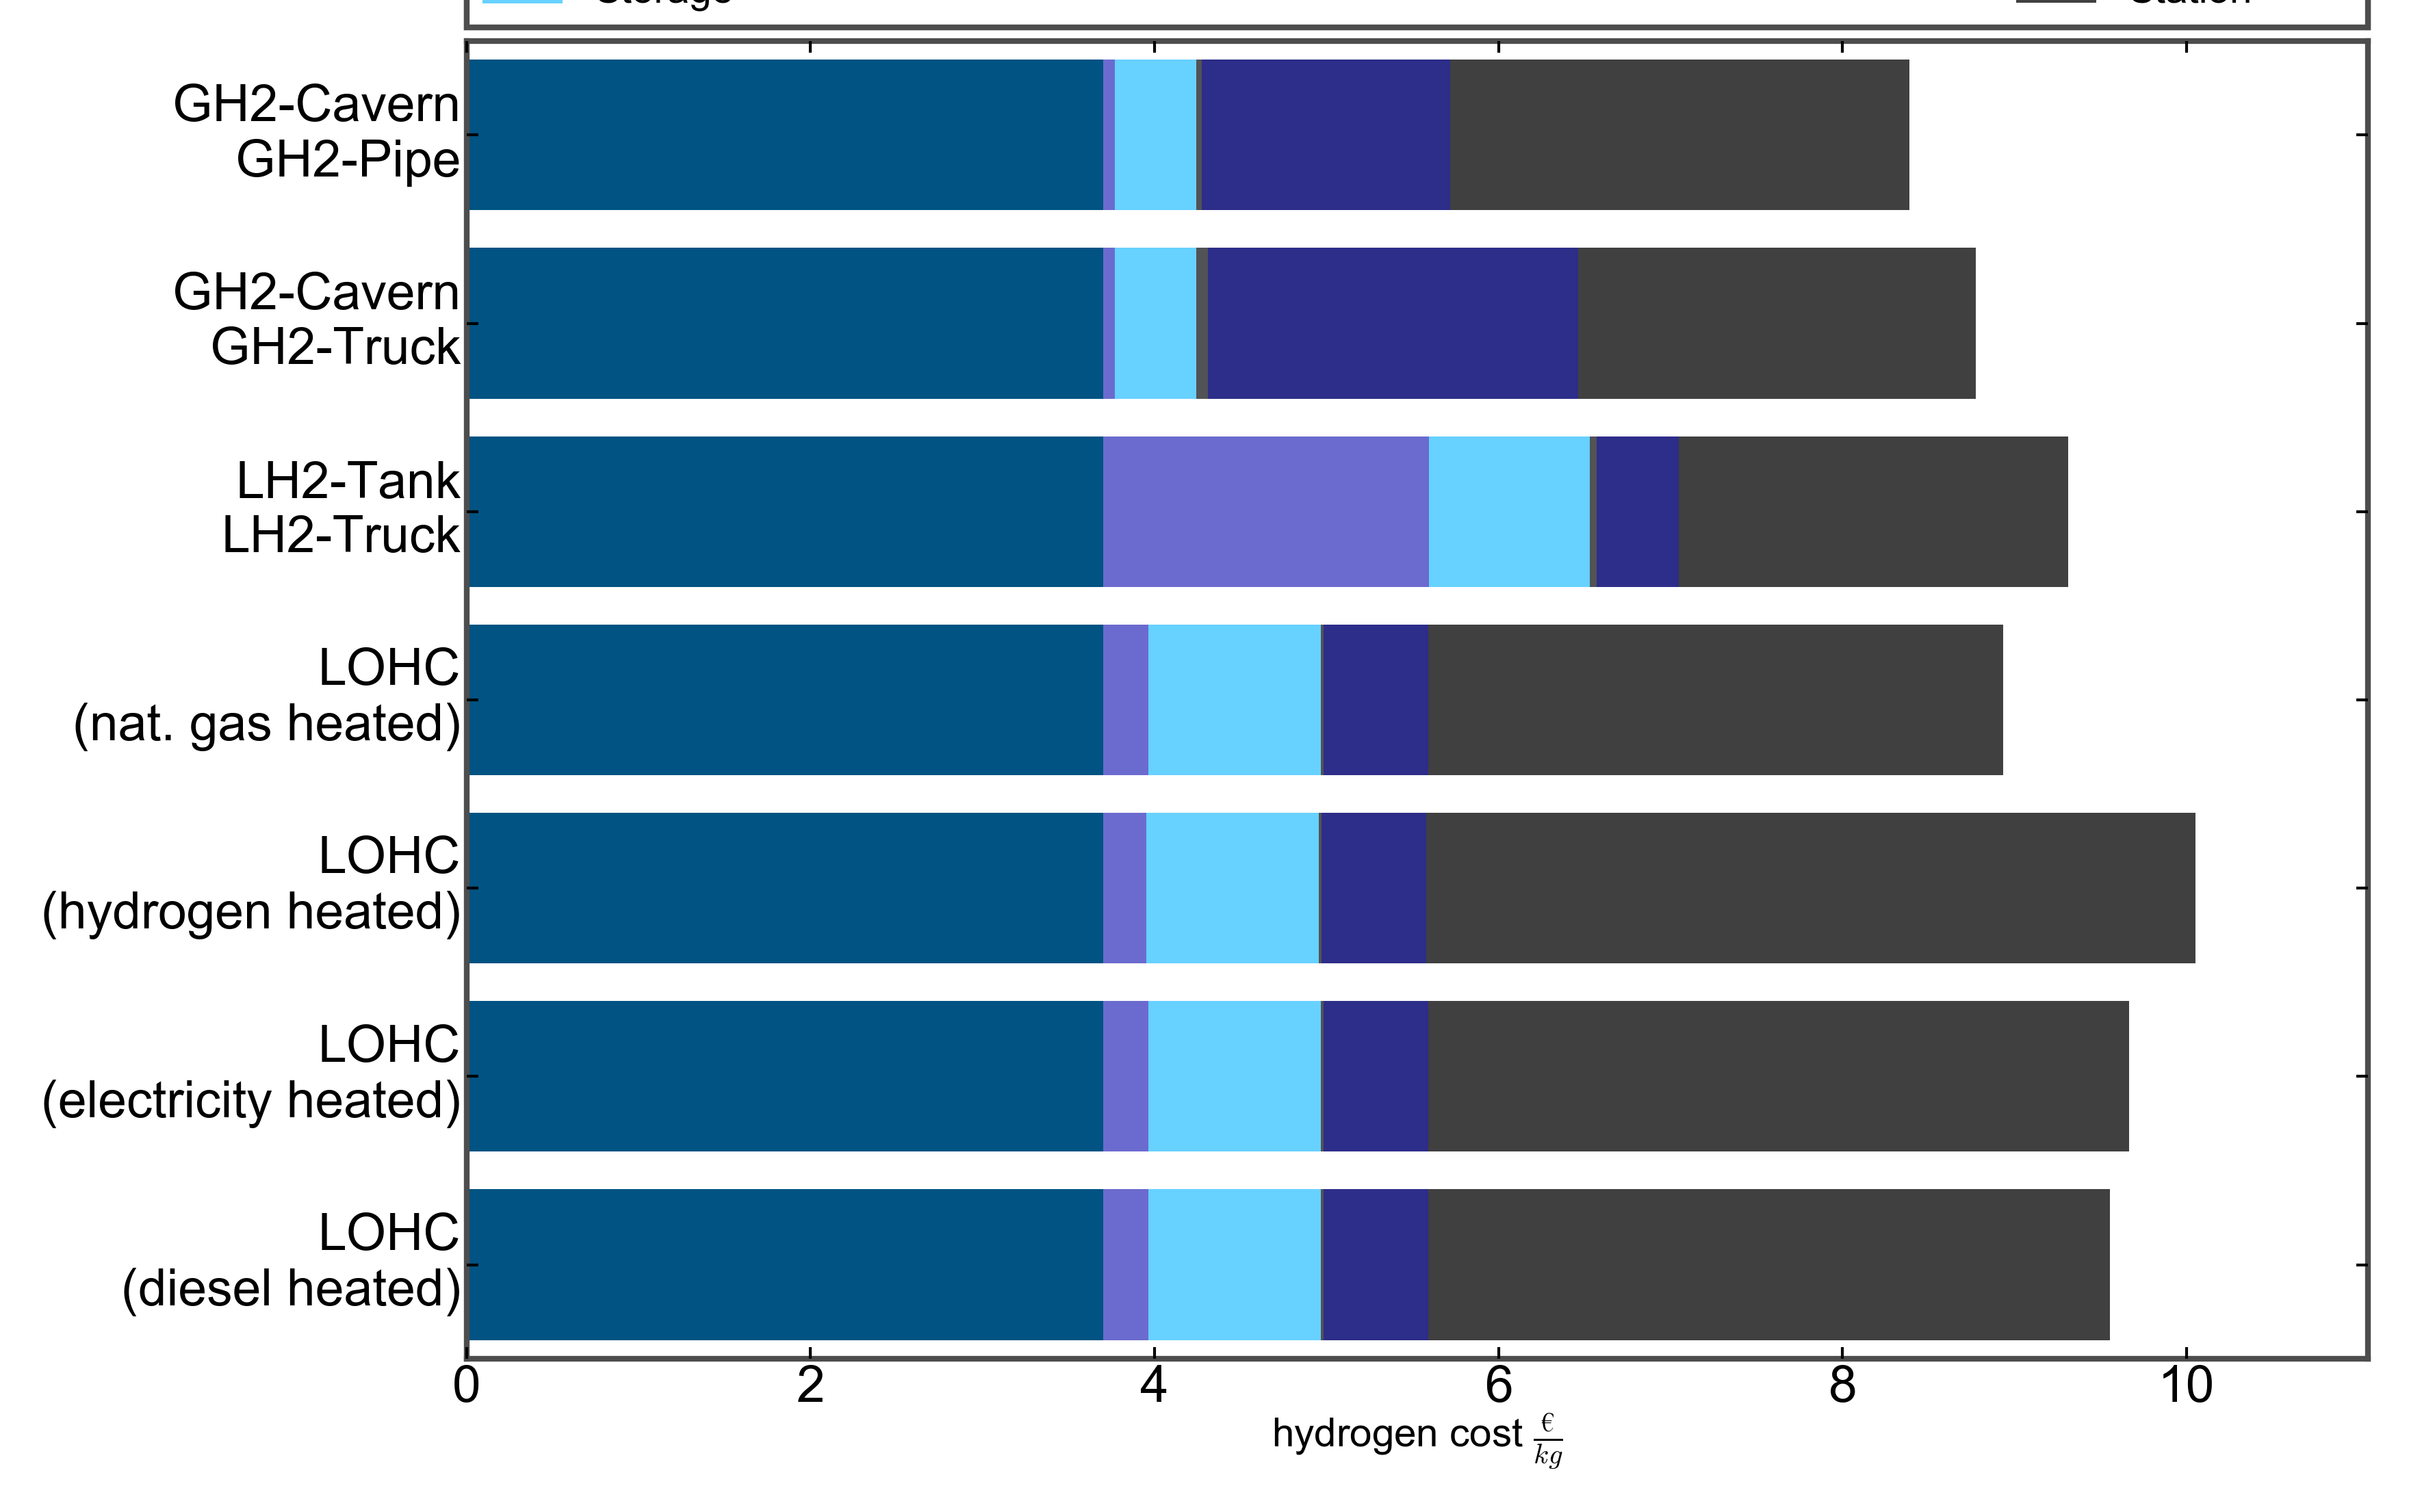

                            Production  Conversion1   Storage  Conversion2  \
GH2-Cavern\nGH2-Pipe          3.700214     0.069247  0.472935     0.033166   
GH2-Cavern\nGH2-Truck         3.700214     0.069247  0.472935     0.069231   
LH2-Tank\nLH2-Truck           3.700214     1.894316  0.936587     0.037721   
LOHC\n(nat. gas heated)       3.700214     0.264708  1.001525     0.015048   
LOHC\n(hydrogen heated)       3.700214     0.252881  1.001525     0.015048   
LOHC\n(electricity heated)    3.700214     0.264708  1.001525     0.015048   
LOHC\n(diesel heated)         3.700214     0.264708  1.001525     0.015048   

                            Transport   Station  
GH2-Cavern\nGH2-Pipe         1.441345  2.669538  
GH2-Cavern\nGH2-Truck        2.152478  2.311891  
LH2-Tank\nLH2-Truck          0.478205  2.265041  
LOHC\n(nat. gas heated)      0.609529  3.341748  
LOHC\n(hydrogen heated)      0.609529  4.471335  
LOHC\n(electricity heated)   0.609529  4.074028  
LOHC\n(diesel heated)    

In [31]:
##plot costs in €/kg
pFun.stackedBarChart(chainCost,
                     technologies,
                     stepsSimple,
                     distMax,
                     demMax,
                     title= 'Cost of different chain part',
                     labelTitle=r'hydrogen cost $\frac{€}{kg}$',
                     figSize=figureSize,
                     saveFig=True,
                     savePath=resultpath,
                     saveName="CostComparisonLOHC")
CCost3=pd.DataFrame(data=chainCost, index=technologies, columns = stepsSimple)

print(CCost3)

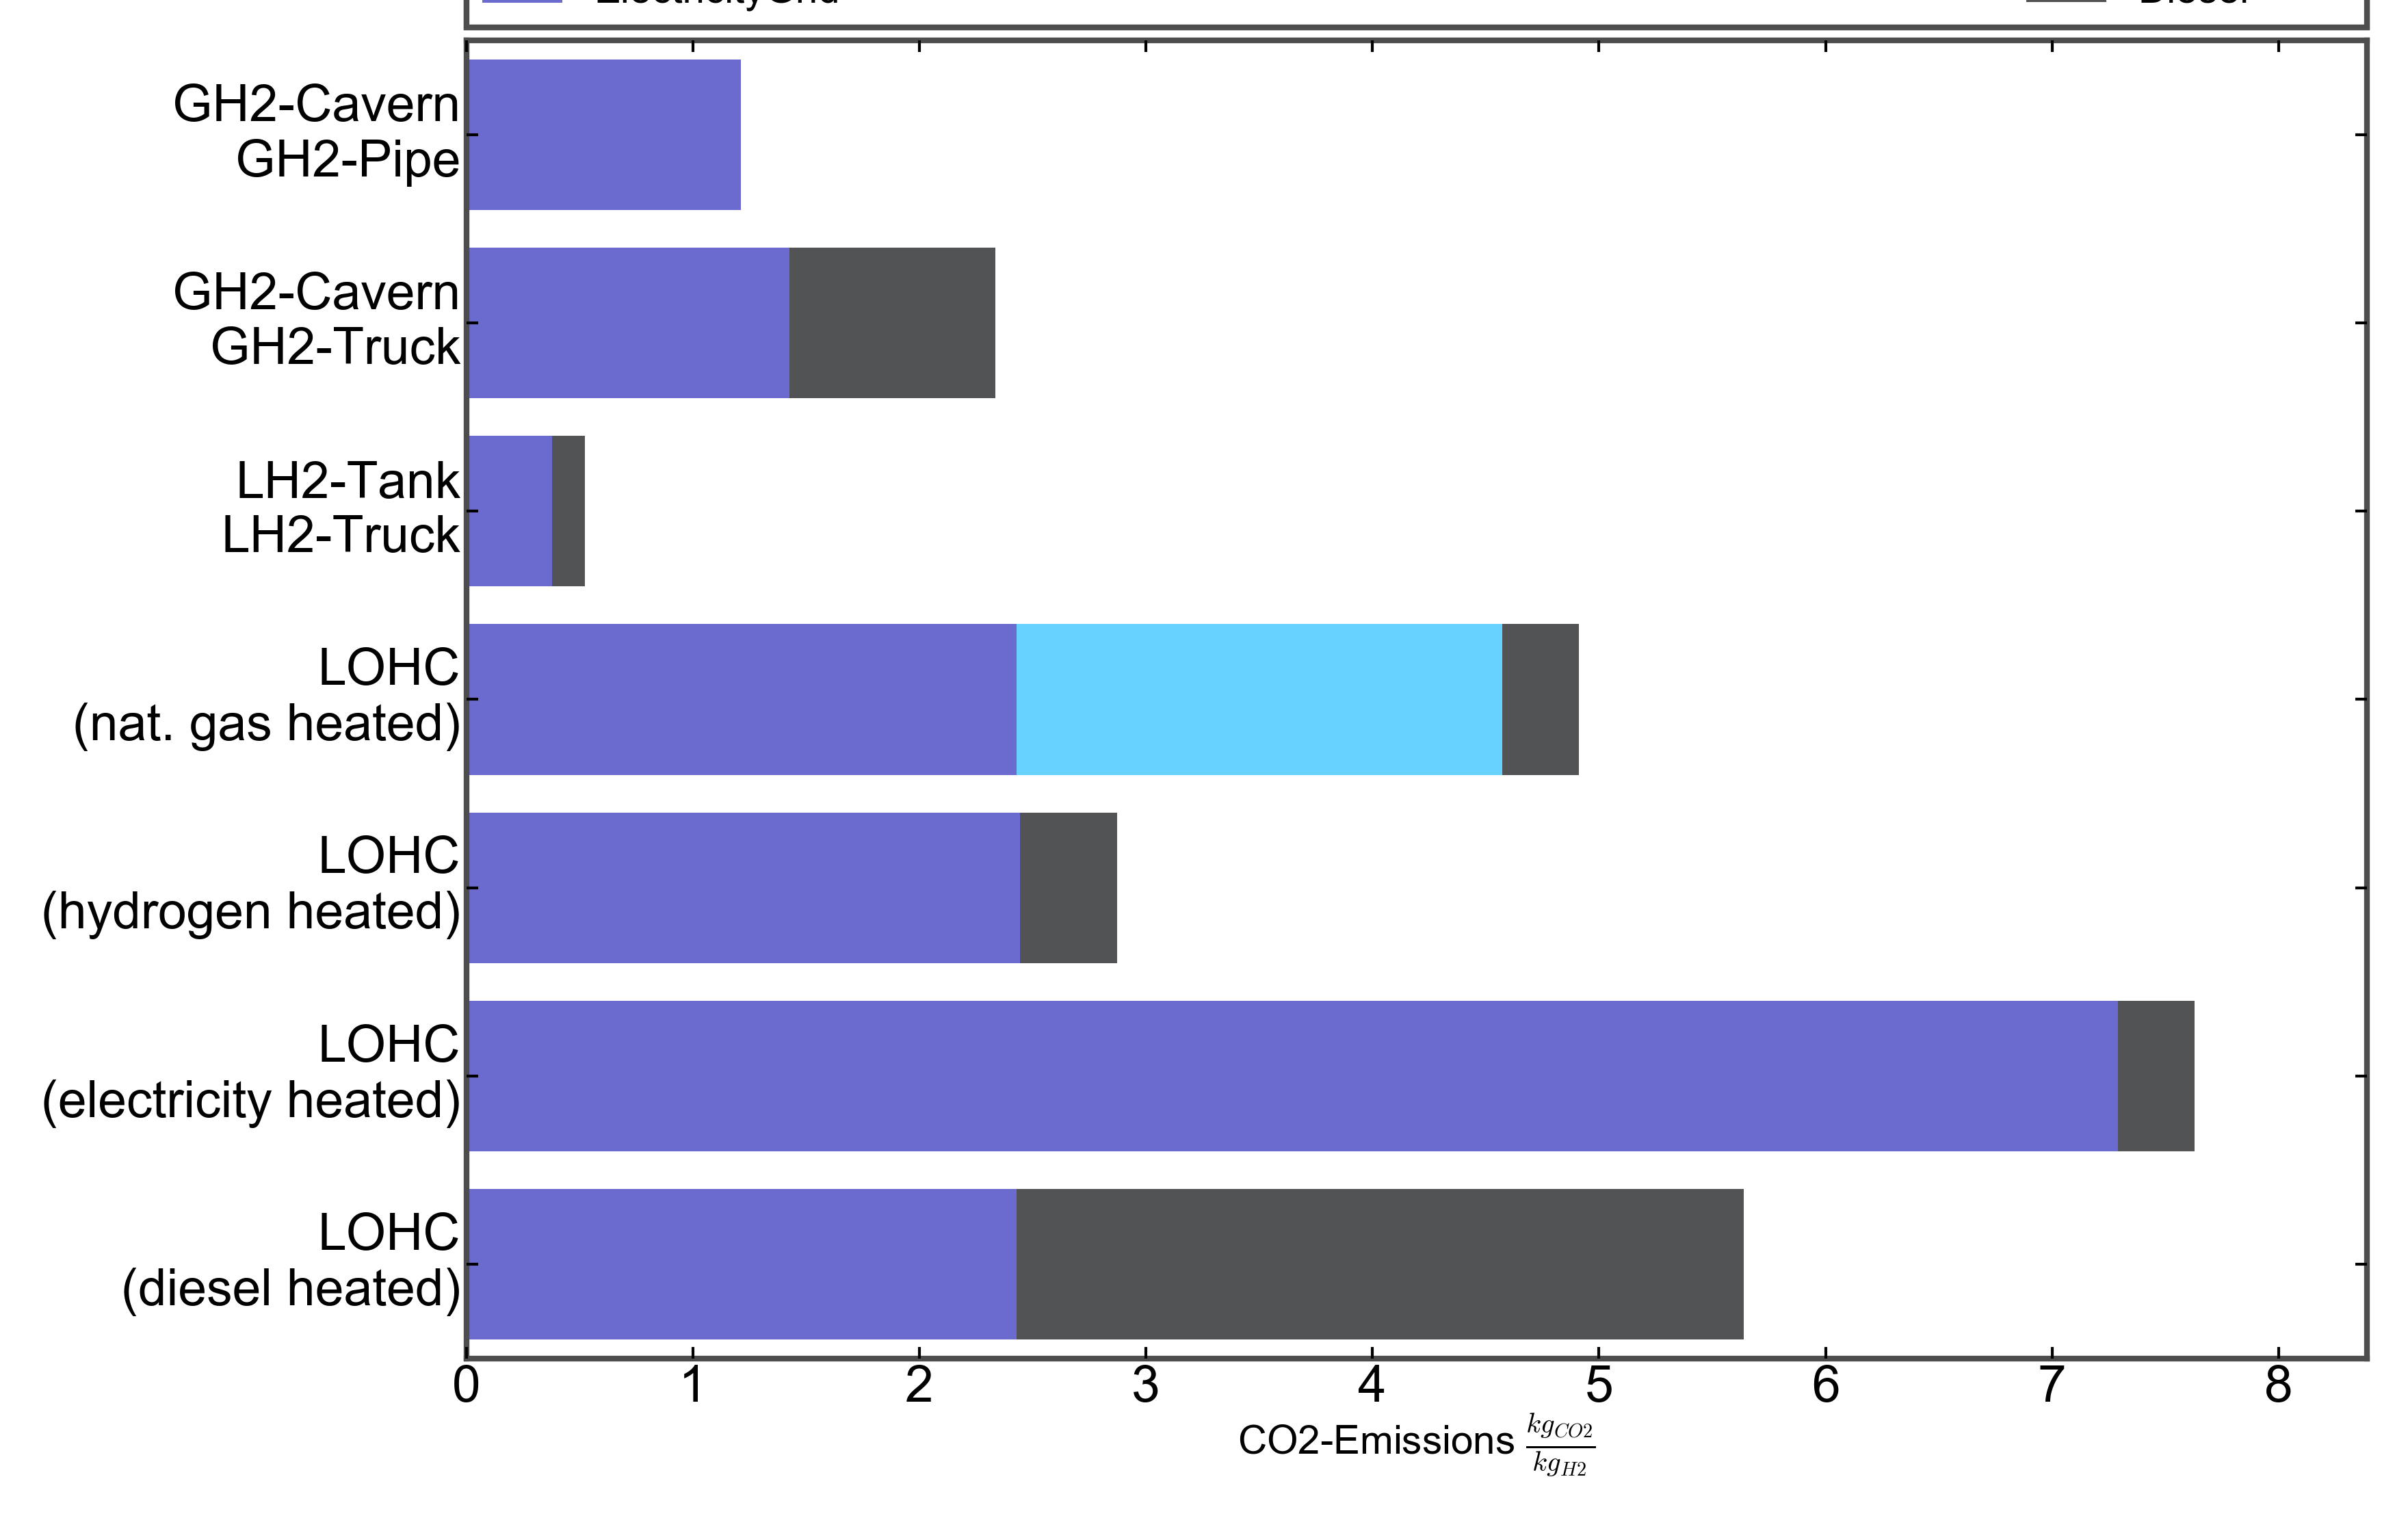

                            Production  Conversion1   Storage  Conversion2  \
GH2-Cavern\nGH2-Pipe          3.700214     0.069247  0.472935     0.033166   
GH2-Cavern\nGH2-Truck         3.700214     0.069247  0.472935     0.069231   
LH2-Tank\nLH2-Truck           3.700214     1.894316  0.936587     0.037721   
LOHC\n(nat. gas heated)       3.700214     0.264708  1.001525     0.015048   
LOHC\n(hydrogen heated)       3.700214     0.252881  1.001525     0.015048   
LOHC\n(electricity heated)    3.700214     0.264708  1.001525     0.015048   
LOHC\n(diesel heated)         3.700214     0.264708  1.001525     0.015048   

                            Transport   Station  
GH2-Cavern\nGH2-Pipe         1.441345  2.669538  
GH2-Cavern\nGH2-Truck        2.152478  2.311891  
LH2-Tank\nLH2-Truck          0.478205  2.265041  
LOHC\n(nat. gas heated)      0.609529  3.341748  
LOHC\n(hydrogen heated)      0.609529  4.471335  
LOHC\n(electricity heated)   0.609529  4.074028  
LOHC\n(diesel heated)    

In [32]:
## plot CO2-emissions depending on chain part
pFun.stackedBarChart(energyCO2Emissions,
                     technologies,
                     energiesNoHydrogen,
                     distMax,
                     demMax,
                     title= 'Cost of different chain part',
                     labelTitle=r'CO2-Emissions $\frac{kg_{CO2}}{kg_{H2}}$',
                     figSize=figureSize,
                     saveFig=True,
                     savePath=resultpath,
                     saveName="CO2ComparisonLOHC")
CO2Cost3=pd.DataFrame(data=chainCost, index=technologies, columns = stepsSimple)

print(CO2Cost3)

# Sensitivity Analysis

To show the different sensitivities of all pathways, the following part will show tornado plots of each pathway

In [33]:
np.set_printoptions(suppress=True)

In [34]:
# %% calculate demand and distance arrays
demMax = 50000
distMax = 250
demArr, distArr = cFun.builtDemDistArray(
                                        demMax,      # maximal demand
                                        distMax,        # maximal distance
                                        res=1)              # resolution
dfHSC = cFun.BuiltHSC(dfTable, conn=1)

Preprocessing

In [35]:
# %% Input HSC
sensParam = 10
fin = np.empty((sensParam, len(dfHSC), 3))
finTest = np.empty((sensParam, len(dfHSC), 3))

dfTableChange = pd.DataFrame(dfTable['General']['General'])
dfTableChange['TornadoMin'] = dfTable['General']['General'].values * 0.8
dfTableChange['TornadoMax'] = dfTable['General']['General'].values * 1.2

Calculation

In [36]:
# %%Calculation HSC
for x in range(sensParam):
    for y in range(3):
        if y == 0:
            dfTable['General']['General'].values[x] = dfTableChange['TornadoMin'][x]
        elif y == 1:
            dfTable['General']['General'].values[x] = dfTableChange['General'][x]
        elif y == 2:
            dfTable['General']['General'].values[x] = dfTableChange['TornadoMax'][x]

        for i in range(len(dfHSC)): 
            # Module Calculation    
            Production, Connector1, Storage, Connector2, Transport, Station = cFun.calcHSC(demArr, distArr, dfHSC, dfTable, i)  
            # Read interesting Numbers
            fin[x,i,y] = Station.getTotalCost()#-a.getTotalCost()
        dfTable['General']['General'].values[x] = dfTableChange['General'][x]
        
    for y in range (3):
        finTest[x,:,y] = fin[x,:,y] / fin[x,:,1]

Postprocessing

In [ ]:
best = 7  # how many values shall be shown

technologies = list(dfHSC['General'])
variables = dfTableChange.index.values
varValues = np.ndarray.tolist(dfTable['General']['General'].values[:sensParam])
varUnits = list(dfTable['General']['Units'].values[:sensParam])

highestImpact = pd.DataFrame(data=np.zeros((len(variables),3)),
                             columns=['First', 'Second', 'Third'],
                             index=variables)

Plotting

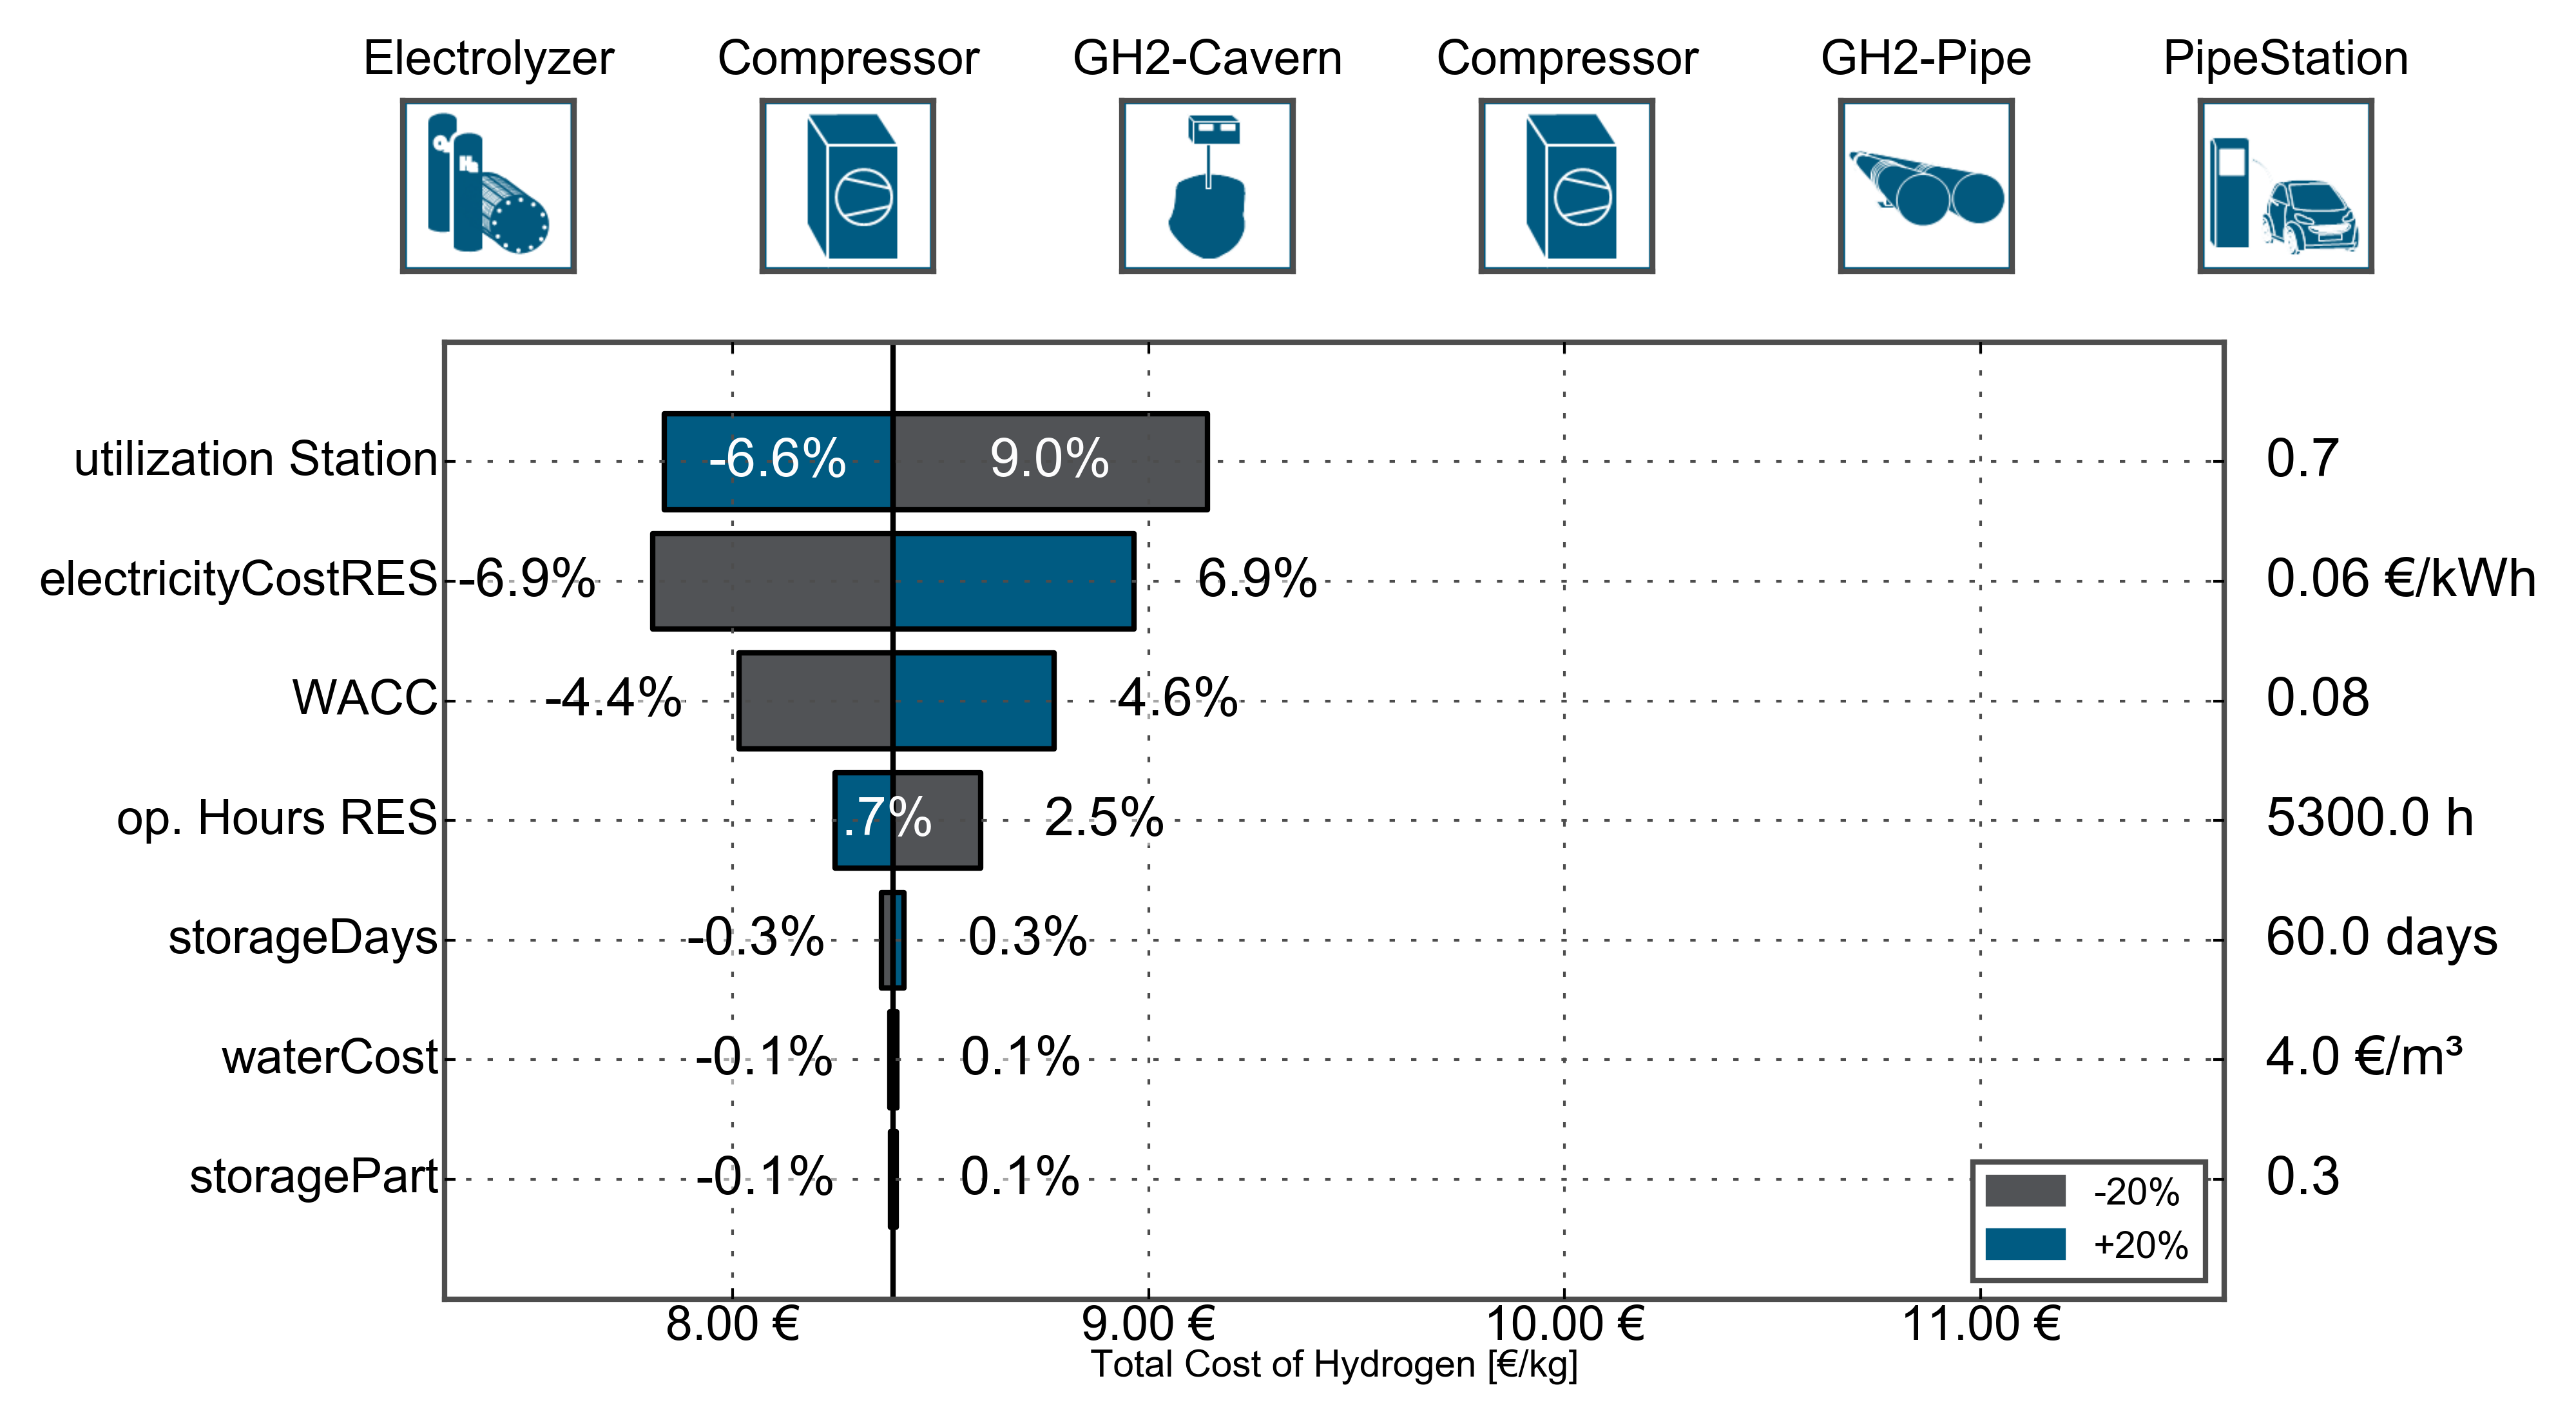

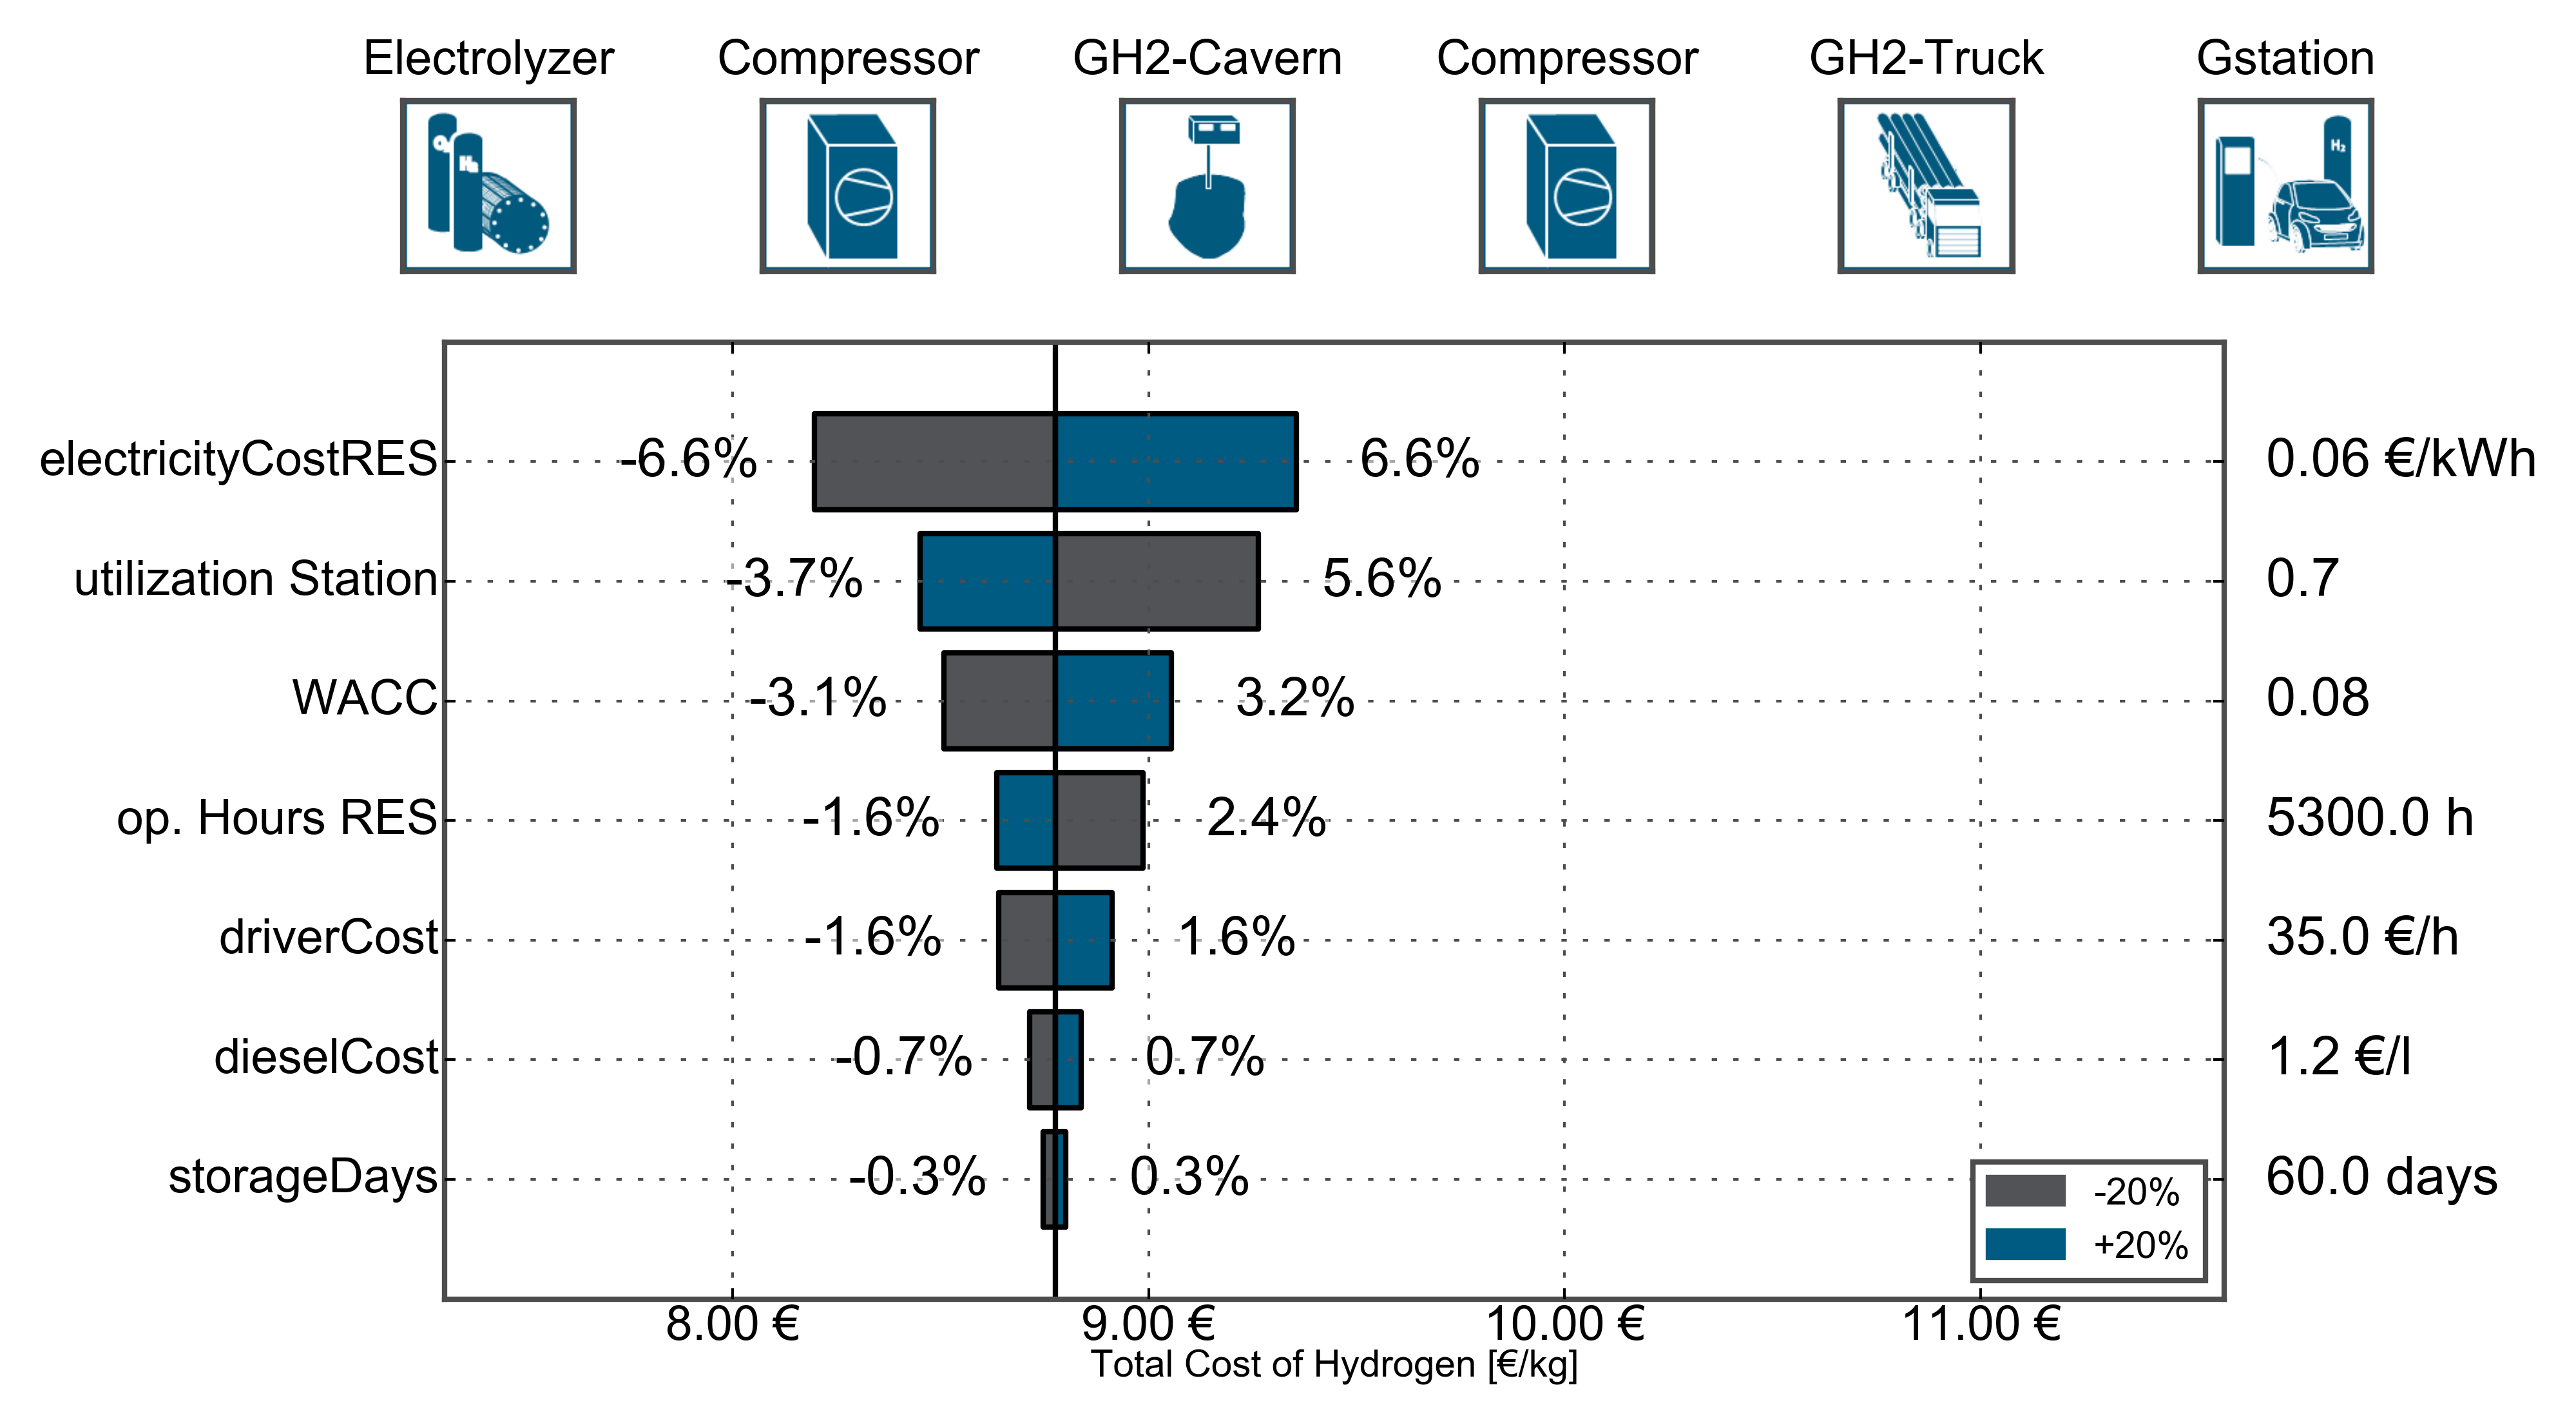

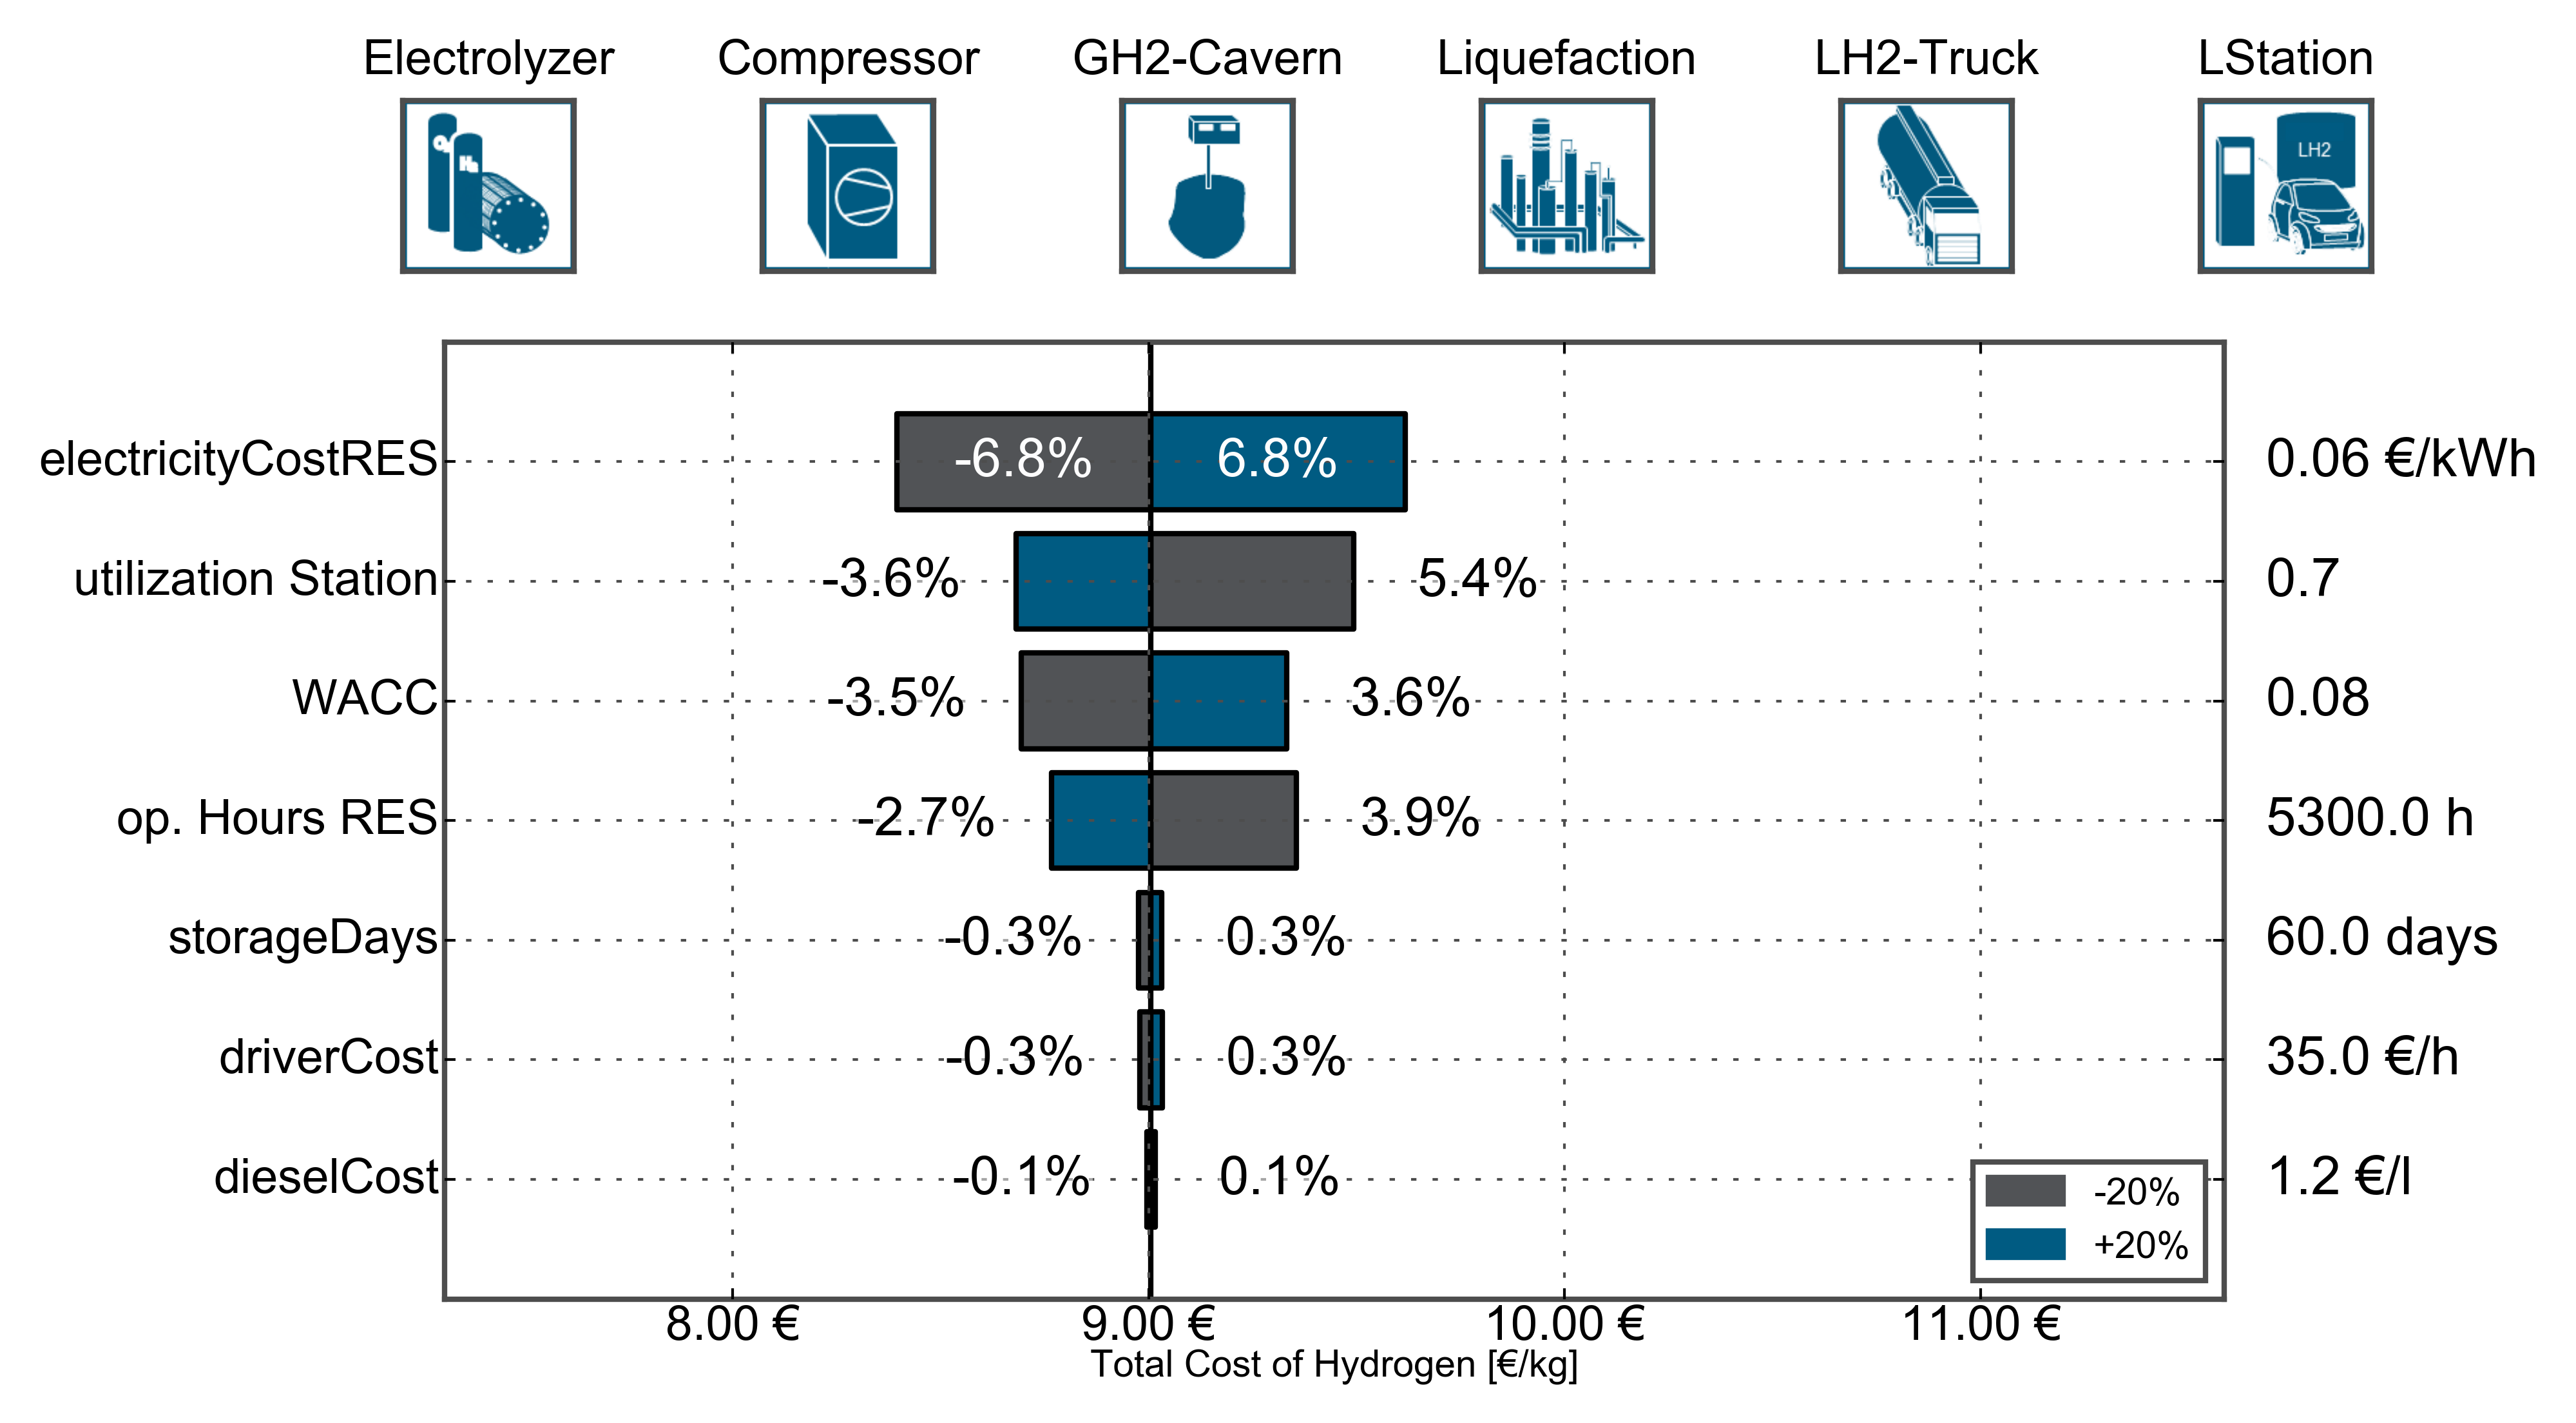

In [ ]:
# %% Plot Tornado Charts
for x in range(len(technologies)):
    first, second, third = pFun.tornado(fin,
                                        technologies,
                                        variables,
                                        x,
                                        distMax,
                                        demMax,
                                        varValues,
                                        varUnits,
                                        dfHSC,
                                        imagepath,
                                        best,
                                        figSize=(7,4.),
                                        saveFig=True,
                                        savePath=resultpath,
                                        saveName='TornadoChart'
                                        )
    for i in range(len(variables)):
        if variables[i] == first:
            highestImpact['First'][i] += 1
        if variables[i] == second:
            highestImpact['Second'][i] += 1
        if variables[i] == third:
            highestImpact['Third'][i] += 1

To show the most important imput variable, we sum up the most important variables. Obviously, the electricity cost for RES and the utilization of the station are the two most important factors.

In [ ]:
# %% Analysis Highest Impact
highestImpact = highestImpact.query('First + Second + Third != 0')
highestImpact = highestImpact.sort_values('First', ascending=False)
pFun.stackedBarChart(highestImpact.values,
                     highestImpact.index,
                     ['highest impact', 'second-highest impact', 'third-highest impact'],
                     distMax,
                     demMax,
                     labelTitle='Number of Pathways',
                     spaceLeft=1,
                     spaceCol=5,
                     figSize=(3.5,1.5),
                     saveFig=True,
                     savePath=resultpath,
                     saveName='SensitivityAnalysis')